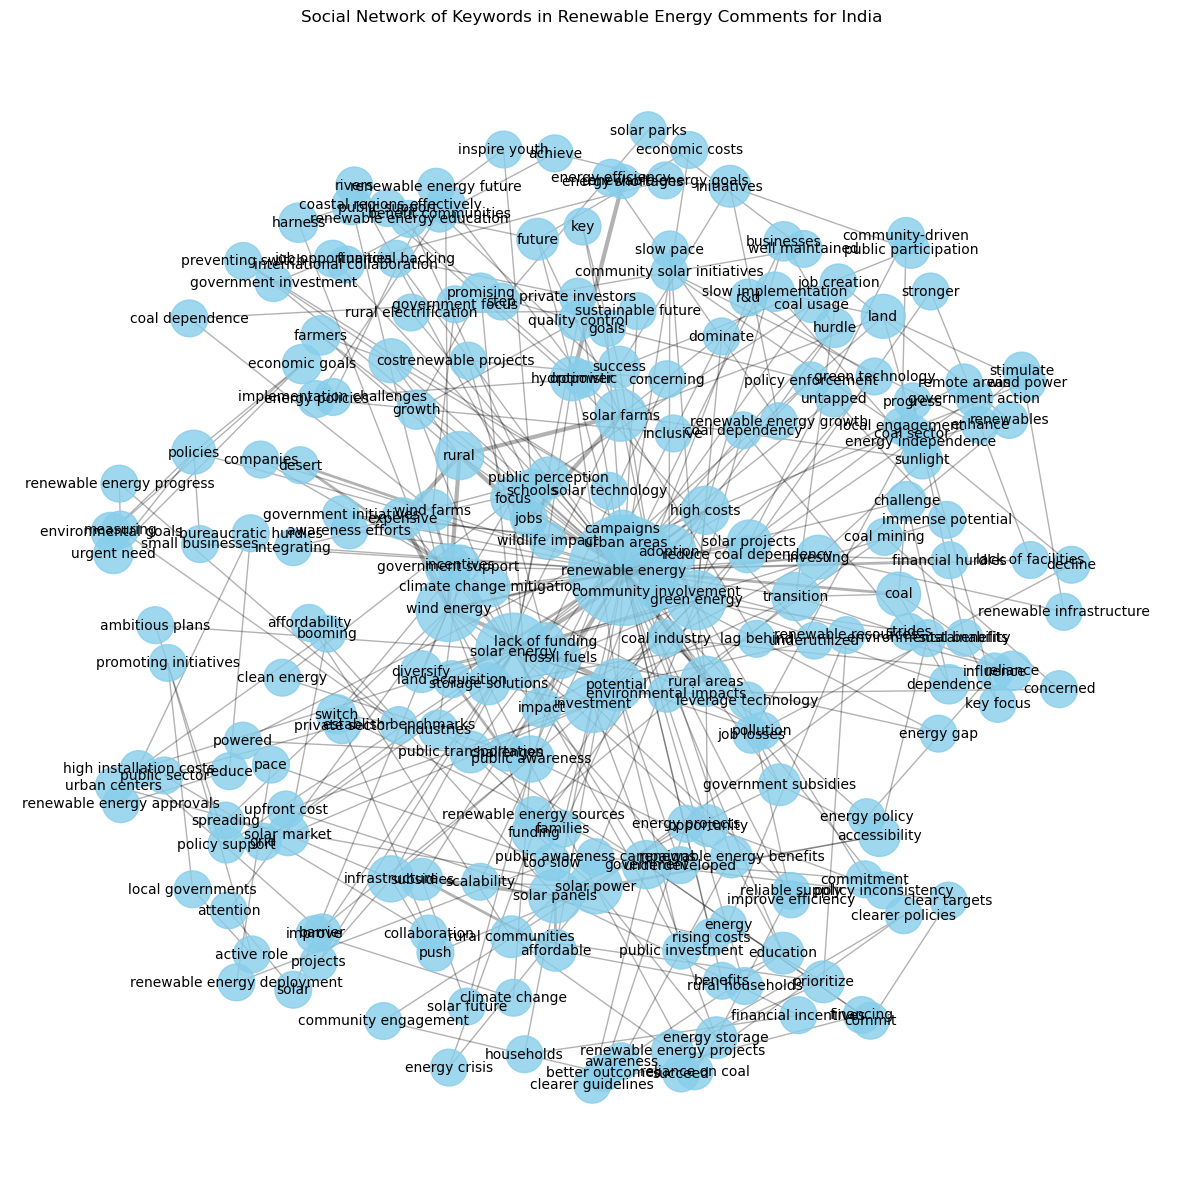

In [163]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from CSV
file_path = 'Comment_topics.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Function to clean keywords
def clean_keywords(keyword_string):
    return [kw.strip().lower() for kw in keyword_string.split(',')]

# Extract keywords from the 'Keywords' column and clean them
df['Keywords'] = df['Keywords'].apply(clean_keywords)

# Function to create a network graph based on filtered data
def create_network_graph(df, country, weight_threshold=1):
    # Filter the DataFrame for the specified country
    filtered_df = df[df['Country'].str.lower() == country.lower()]

    # Initialize a network graph
    G = nx.Graph()

    # Add nodes and edges based on co-occurrence of keywords in each comment
    for keywords in filtered_df['Keywords']:
        # For each row (comment), create edges between all pairs of keywords
        for kw1, kw2 in combinations(keywords, 2):
            if G.has_edge(kw1, kw2):
                G[kw1][kw2]['weight'] += 1  # Increment weight if the edge already exists
            else:
                G.add_edge(kw1, kw2, weight=1)  # Add a new edge

    # Remove edges below the weight threshold
    G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold])

    # Draw the network graph
    plt.figure(figsize=(15, 15))  # Increase the figure size

    # Position nodes using a different layout (spring layout, circular layout, etc.)
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Draw nodes
    node_sizes = [500 + (len(list(G.neighbors(n))) * 100) for n in G.nodes()]  # Size based on degree
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)

    # Draw edges with varying thickness based on weight
    edges = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edges(G, pos, width=[v for v in edges.values()], alpha=0.3)  # Lower edge transparency

    # Add labels to nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Display the graph
    plt.title(f"Social Network of Keywords in Renewable Energy Comments for {country.capitalize()}")
    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage
create_network_graph(df, 'India')  # Change 'Australia' to 'China', 'Singapore', or 'India' as needed


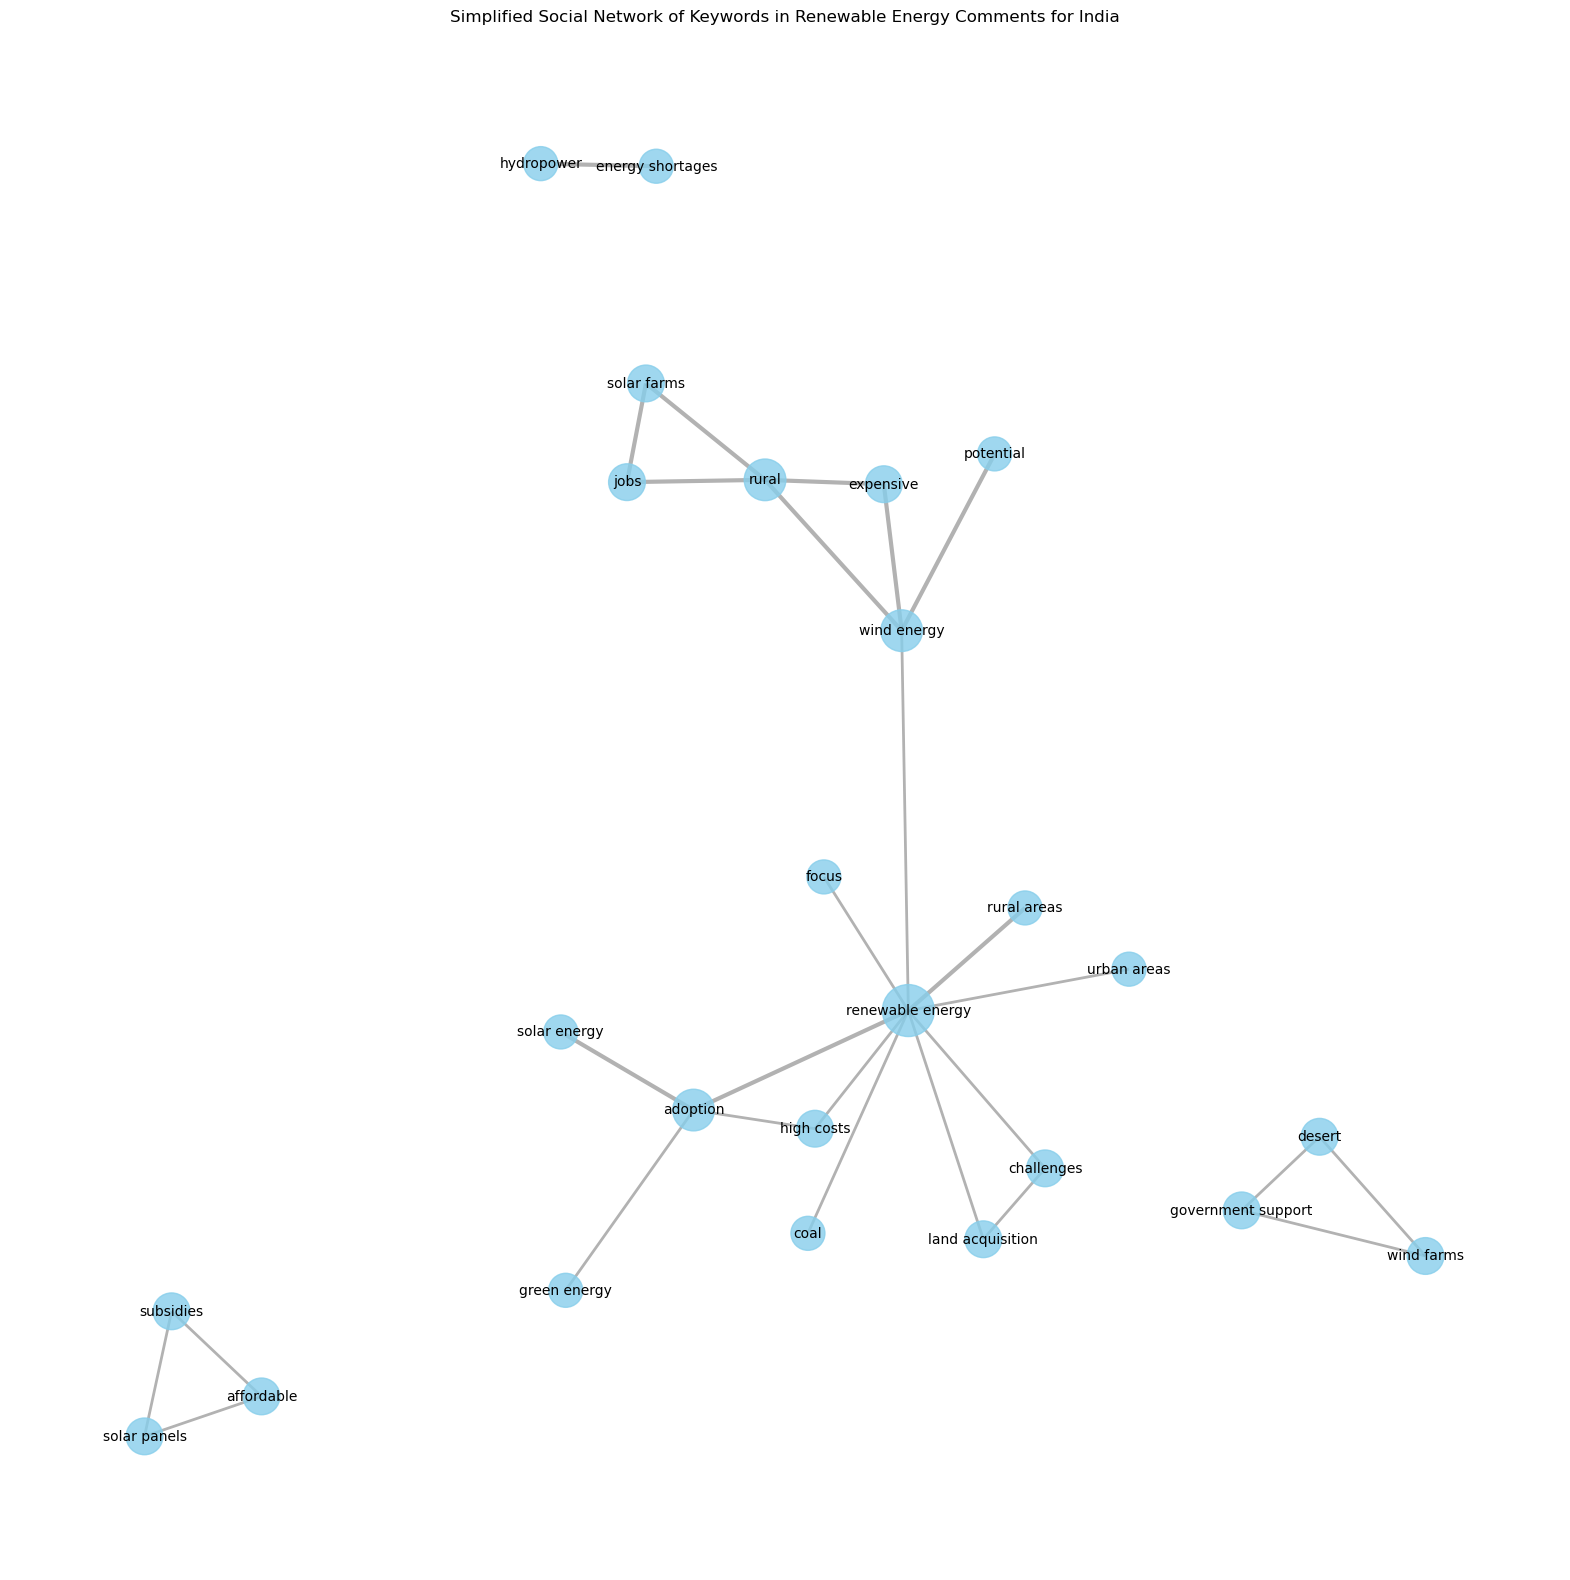

In [169]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from CSV
file_path = 'Comment_topics.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Function to clean keywords
def clean_keywords(keyword_string):
    return [kw.strip().lower() for kw in keyword_string.split(',')]

# Extract keywords from the 'Keywords' column and clean them
df['Keywords'] = df['Keywords'].apply(clean_keywords)

# Function to create a simplified network graph based on filtered data
def create_simplified_network_graph(df, country, weight_threshold=2, top_n_nodes=None):
    # Filter the DataFrame for the specified country
    filtered_df = df[df['Country'].str.lower() == country.lower()]

    # Initialize a network graph
    G = nx.Graph()

    # Add nodes and edges based on co-occurrence of keywords in each comment
    for keywords in filtered_df['Keywords']:
        # For each row (comment), create edges between all pairs of keywords
        for kw1, kw2 in combinations(keywords, 2):
            if G.has_edge(kw1, kw2):
                G[kw1][kw2]['weight'] += 1  # Increment weight if the edge already exists
            else:
                G.add_edge(kw1, kw2, weight=1)  # Add a new edge

    # Remove edges below the weight threshold
    G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold])

    # Optionally remove nodes with very low degree (no. of connections)
    if top_n_nodes:
        degrees = dict(G.degree())
        # Sort nodes by degree and keep only top N nodes
        top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_n_nodes]
        G = G.subgraph(top_nodes).copy()

    # Remove isolated nodes (nodes with no edges)
    G.remove_nodes_from(list(nx.isolates(G)))

    # Draw the simplified network graph
    plt.figure(figsize=(20, 20))  # Increase the figure size

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Draw nodes, size based on degree
    node_sizes = [500 + (len(list(G.neighbors(n))) * 100) for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)

    # Draw edges with varying thickness based on weight
    edges = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edges(G, pos, width=[v for v in edges.values()], alpha=0.3)

    # Add labels to nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Display the graph
    plt.title(f"Simplified Social Network of Keywords in Renewable Energy Comments for {country.capitalize()}")
    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage with filtering options:
create_simplified_network_graph(df, 'India', weight_threshold=2, top_n_nodes=200)


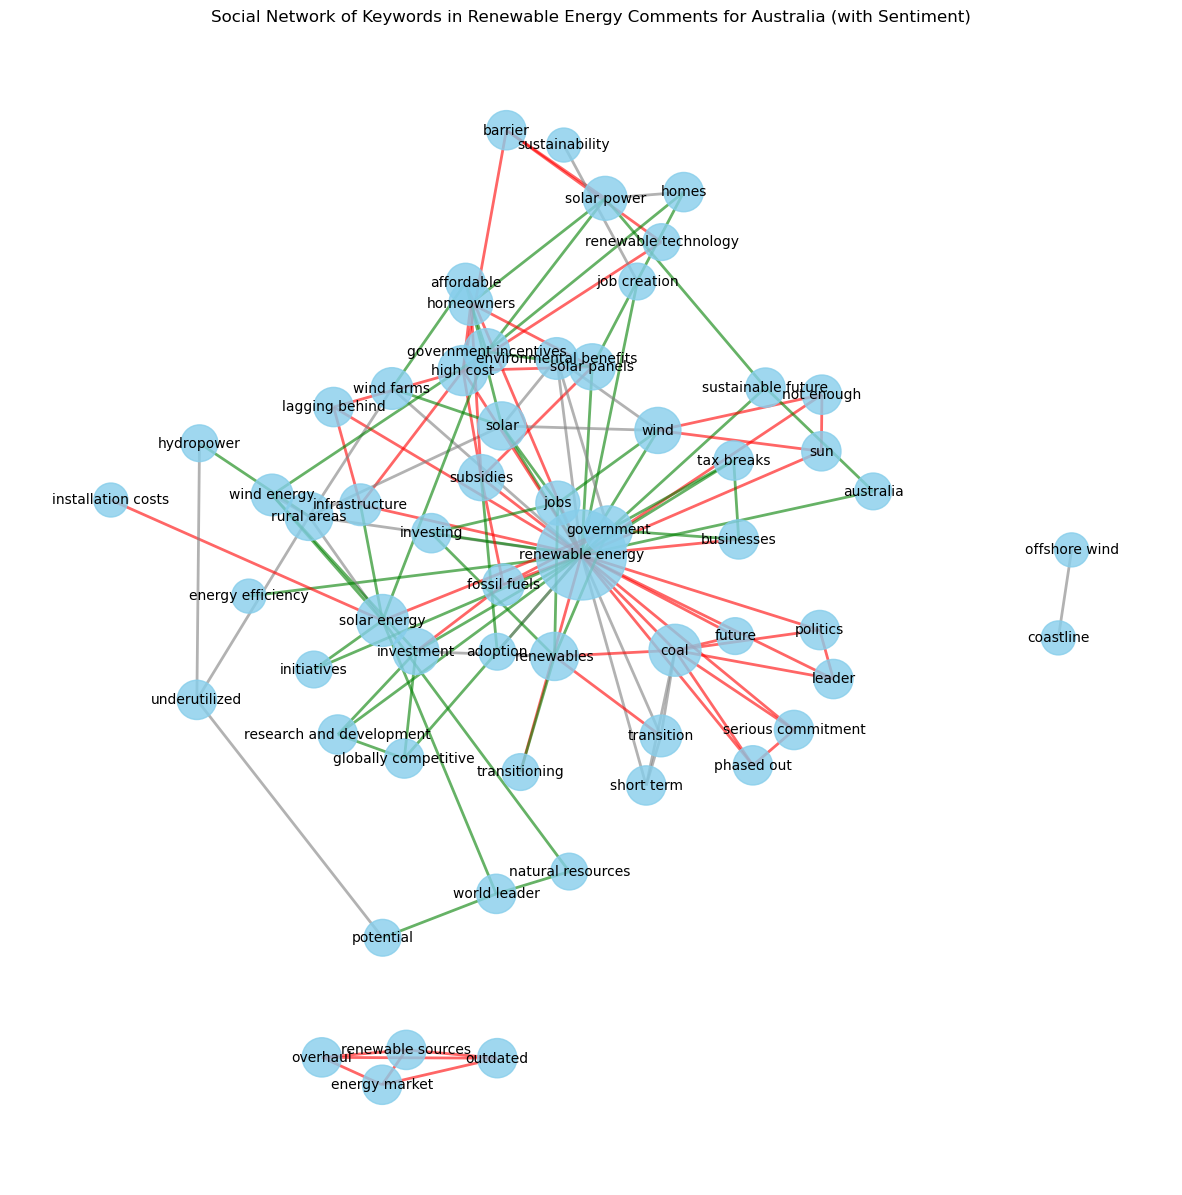

In [171]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the dataset from Excel
file_path = 'Comment_topics.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Function to clean keywords
def clean_keywords(keyword_string):
    return [kw.strip().lower() for kw in keyword_string.split(',')]

# Apply keyword cleaning to the 'Keywords' column
df['Keywords'] = df['Keywords'].apply(clean_keywords)

# Function to create a social network graph with sentiment-based edges
def create_sentiment_network_graph(df, country, weight_threshold=2, top_n_nodes=None):
    # Filter the DataFrame for the specified country
    filtered_df = df[df['Country'].str.lower() == country.lower()]

    # Initialize a network graph
    G = nx.Graph()

    # Add nodes and edges based on co-occurrence of keywords in each comment, with sentiment
    for _, row in filtered_df.iterrows():
        keywords = row['Keywords']
        sentiment = row['Sentiment'].lower()  # Get the sentiment of the comment

        # Create edges between all pairs of keywords within the same comment
        for kw1, kw2 in combinations(keywords, 2):
            if G.has_edge(kw1, kw2):
                G[kw1][kw2]['weight'] += 1  # Increment weight if the edge already exists
            else:
                G.add_edge(kw1, kw2, weight=1, sentiment=sentiment)  # Add a new edge with sentiment

    # Remove edges below the weight threshold
    G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold])

    # Optionally filter to keep only the top N most connected nodes
    if top_n_nodes:
        degrees = dict(G.degree())
        top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_n_nodes]
        G = G.subgraph(top_nodes).copy()

    # Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))

    # Draw the network graph
    plt.figure(figsize=(15, 15))

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Get edge colors based on sentiment
    edge_colors = []
    for u, v, d in G.edges(data=True):
        if d['sentiment'] == 'positive':
            edge_colors.append('green')
        elif d['sentiment'] == 'negative':
            edge_colors.append('red')
        else:
            edge_colors.append('gray')  # Neutral sentiment

    # Draw nodes
    node_sizes = [500 + (len(list(G.neighbors(n))) * 100) for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)

    # Draw edges with sentiment-based colors
    nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors, alpha=0.6)

    # Add labels to nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Display the graph
    plt.title(f"Social Network of Keywords in Renewable Energy Comments for {country.capitalize()} (with Sentiment)")
    plt.axis('off')
    plt.show()

# Example usage with sentiment-based coloring:
create_sentiment_network_graph(df, 'Australia', weight_threshold=1, top_n_nodes=60)  # Change country as needed


C:\Users\shenu\AppData\Local\Temp\ipykernel_36916\2931029688.py:87: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Degree Centrality")


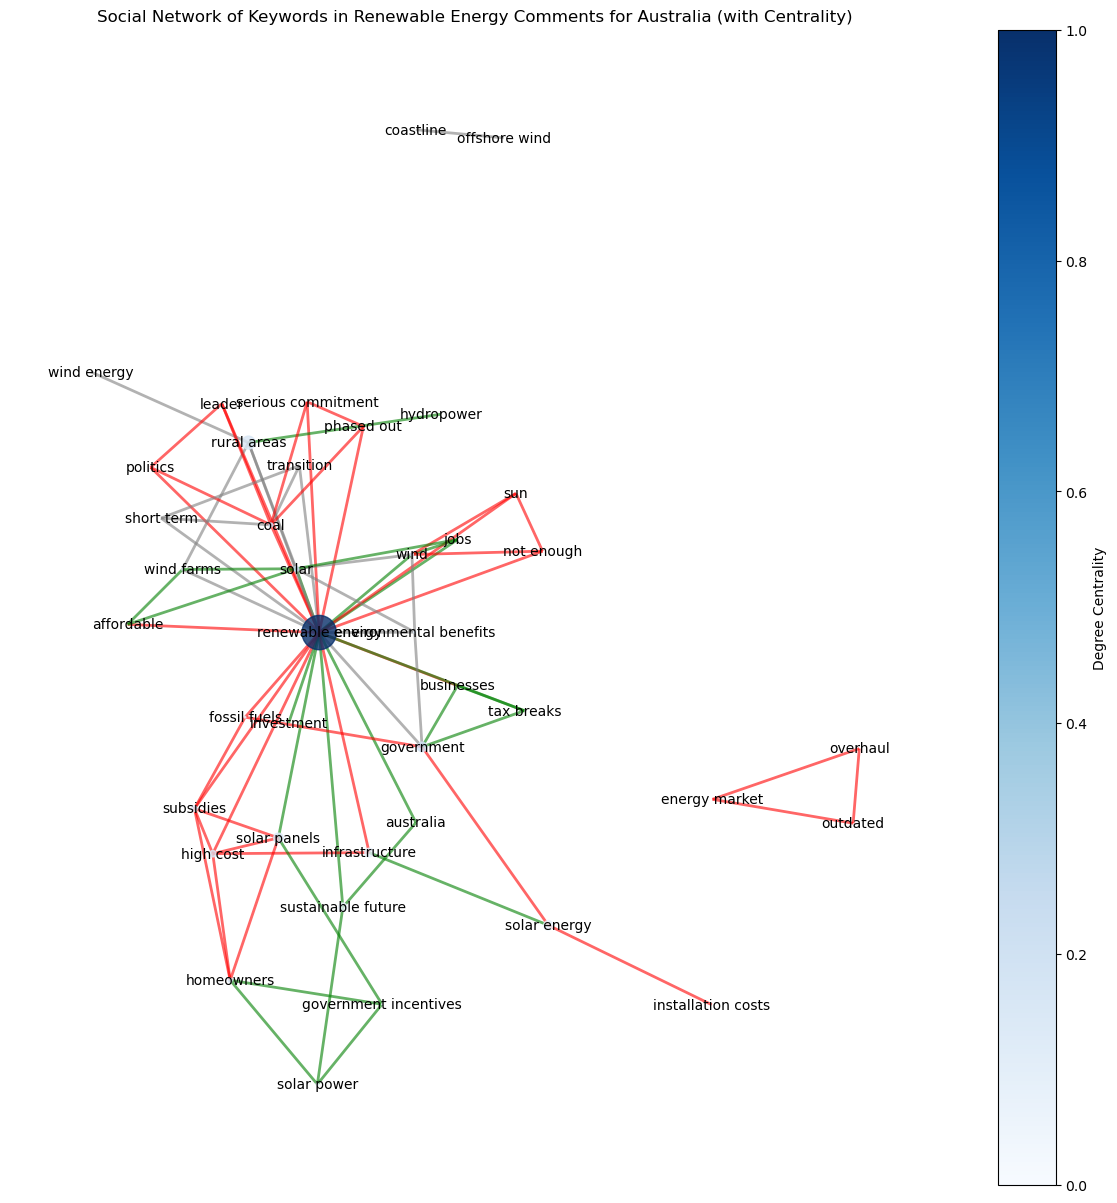

In [111]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the dataset from Excel
file_path = 'Comment_topics.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Function to clean keywords
def clean_keywords(keyword_string):
    return [kw.strip().lower() for kw in keyword_string.split(',')]

# Apply keyword cleaning to the 'Keywords' column
df['Keywords'] = df['Keywords'].apply(clean_keywords)

# Function to create a social network graph with centrality measures
def create_network_graph_with_centrality(df, country, weight_threshold=2, top_n_nodes=None):
    # Filter the DataFrame for the specified country
    filtered_df = df[df['Country'].str.lower() == country.lower()]

    # Initialize a network graph
    G = nx.Graph()

    # Add nodes and edges based on co-occurrence of keywords in each comment, with sentiment
    for _, row in filtered_df.iterrows():
        keywords = row['Keywords']
        sentiment = row['Sentiment'].lower()  # Get the sentiment of the comment

        # Create edges between all pairs of keywords within the same comment
        for kw1, kw2 in combinations(keywords, 2):
            if G.has_edge(kw1, kw2):
                G[kw1][kw2]['weight'] += 1  # Increment weight if the edge already exists
            else:
                G.add_edge(kw1, kw2, weight=1, sentiment=sentiment)  # Add a new edge with sentiment

    # Remove edges below the weight threshold
    G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold])

    # Optionally filter to keep only the top N most connected nodes
    if top_n_nodes:
        degrees = dict(G.degree())
        top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_n_nodes]
        G = G.subgraph(top_nodes).copy()

    # Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))

    # Calculate centrality measures
    betweenness_centrality = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)

    # Normalize centrality values for visualization
    betweenness_centrality_values = [1000 * betweenness_centrality[node] for node in G.nodes()]
    degree_centrality_values = [500 * degree_centrality[node] for node in G.nodes()]

    # Draw the network graph
    plt.figure(figsize=(15, 15))

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Get edge colors based on sentiment
    edge_colors = []
    for u, v, d in G.edges(data=True):
        if d['sentiment'] == 'positive':
            edge_colors.append('green')
        elif d['sentiment'] == 'negative':
            edge_colors.append('red')
        else:
            edge_colors.append('gray')  # Neutral sentiment

    # Draw nodes with betweenness centrality as size and degree centrality as color
    node_sizes = betweenness_centrality_values  # Node size based on betweenness centrality
    node_colors = degree_centrality_values      # Node color intensity based on degree centrality
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, alpha=0.8)

    # Draw edges with sentiment-based colors
    nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors, alpha=0.6)

    # Add labels to nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Display the graph
    plt.title(f"Social Network of Keywords in Renewable Energy Comments for {country.capitalize()} (with Centrality)")
    plt.axis('off')
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Degree Centrality")
    plt.show()

# Example usage with centrality measures:
create_network_graph_with_centrality(df, 'Australia', weight_threshold=1, top_n_nodes=40)  # Change country as needed


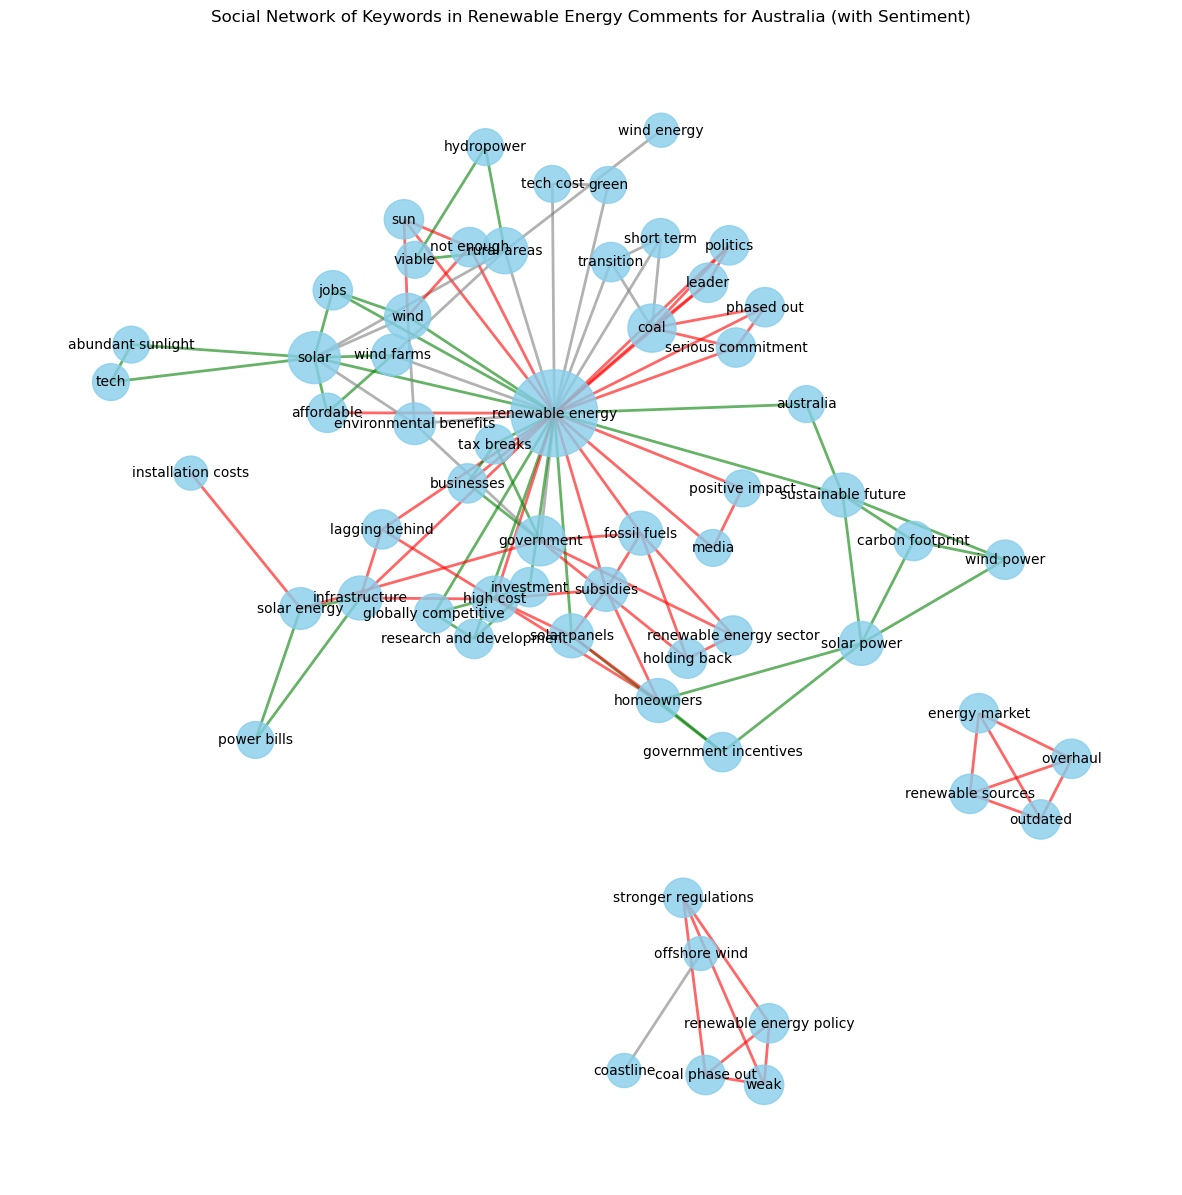

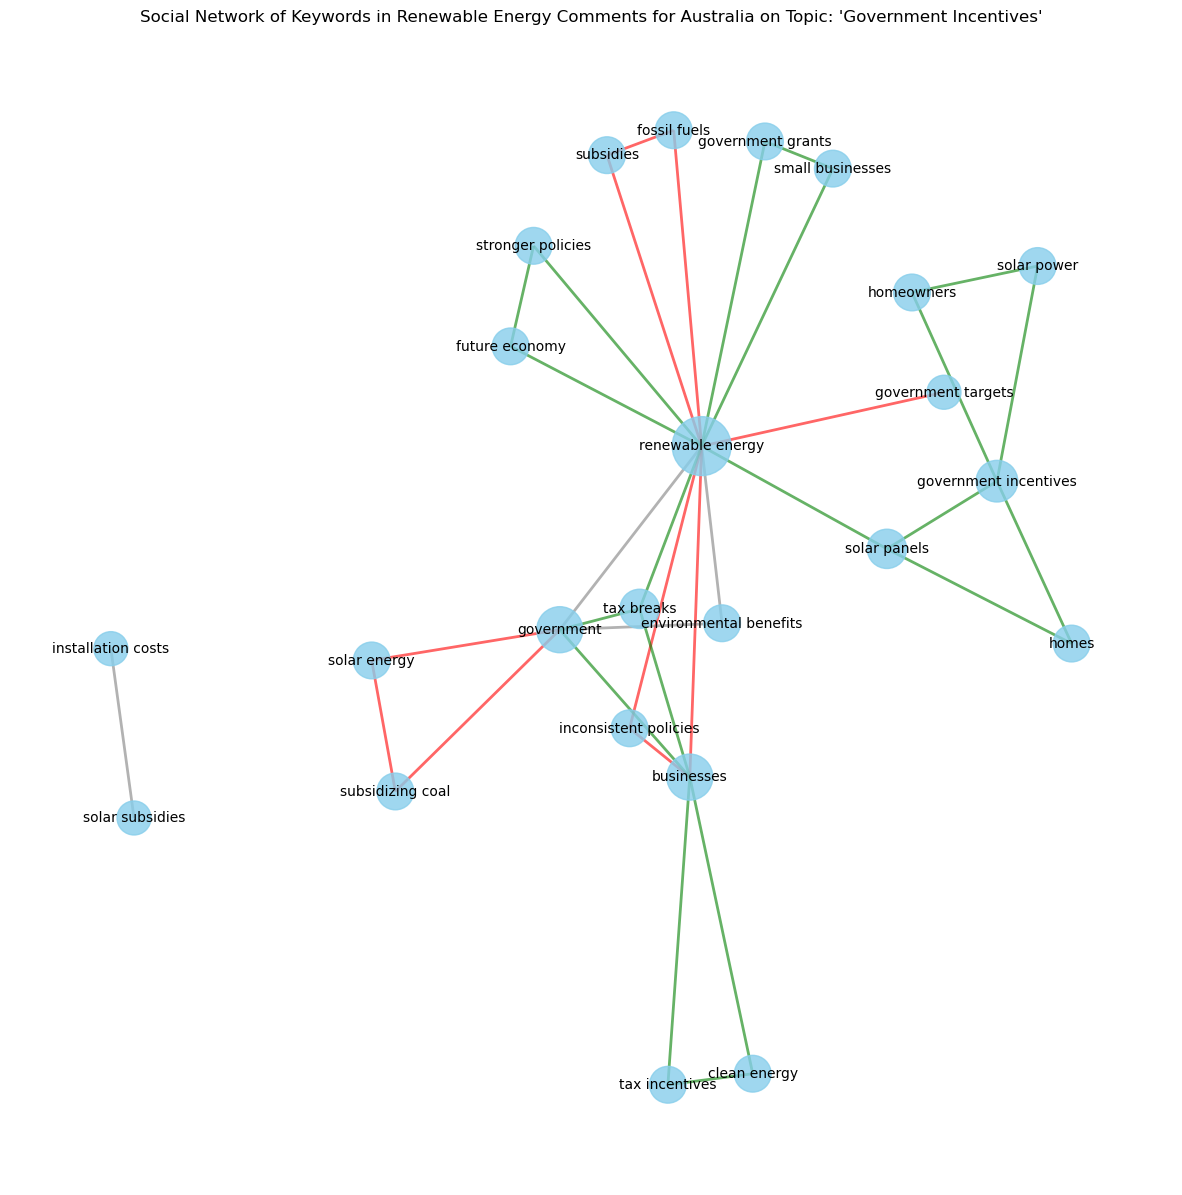

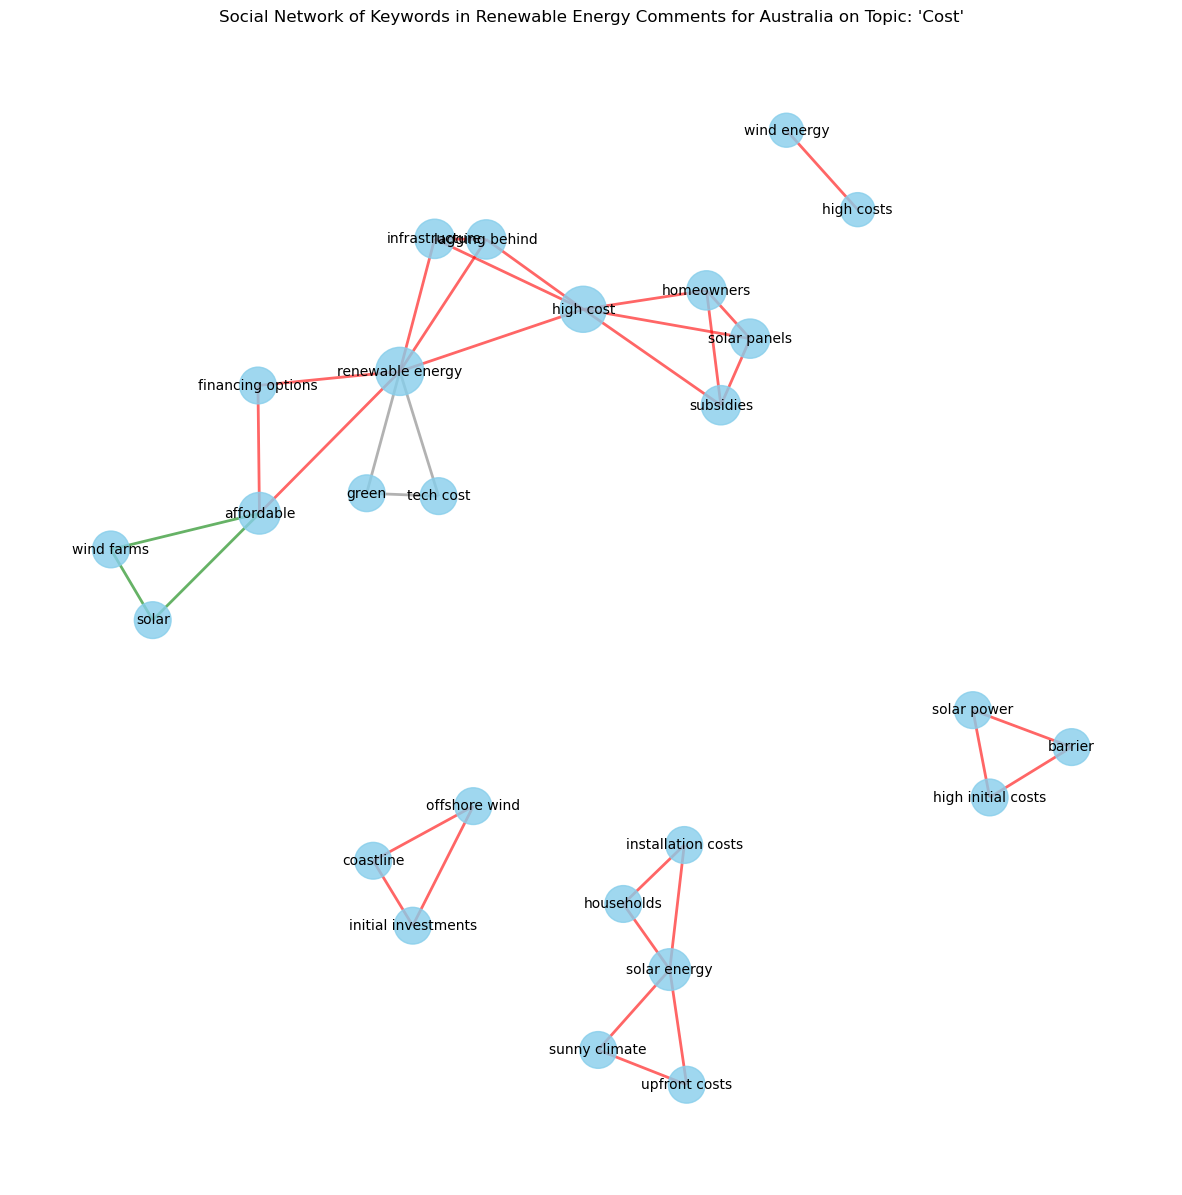

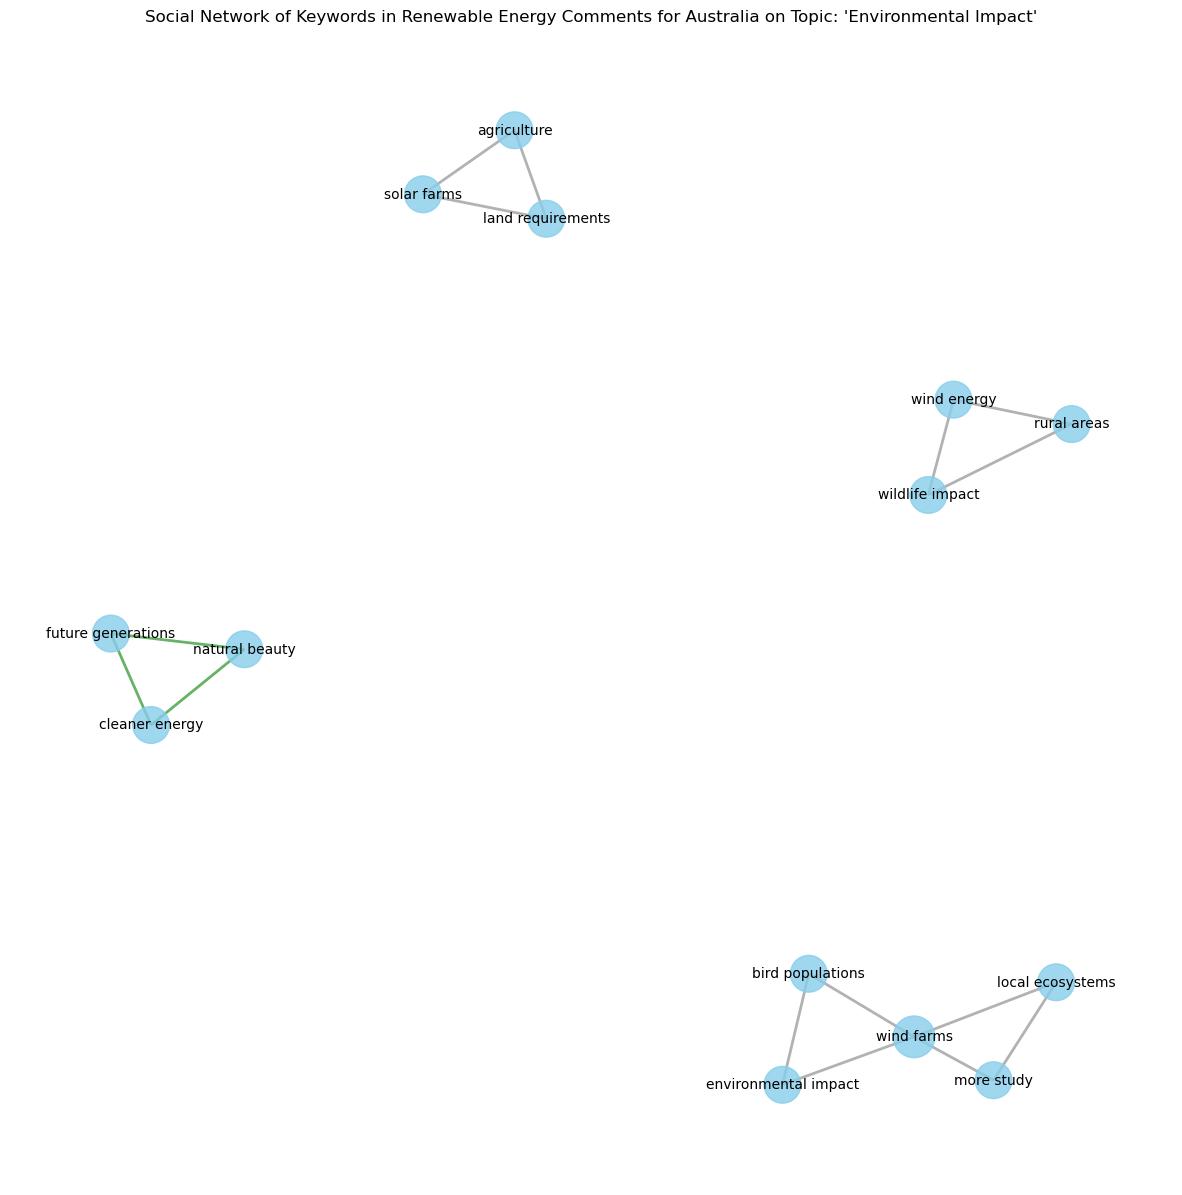

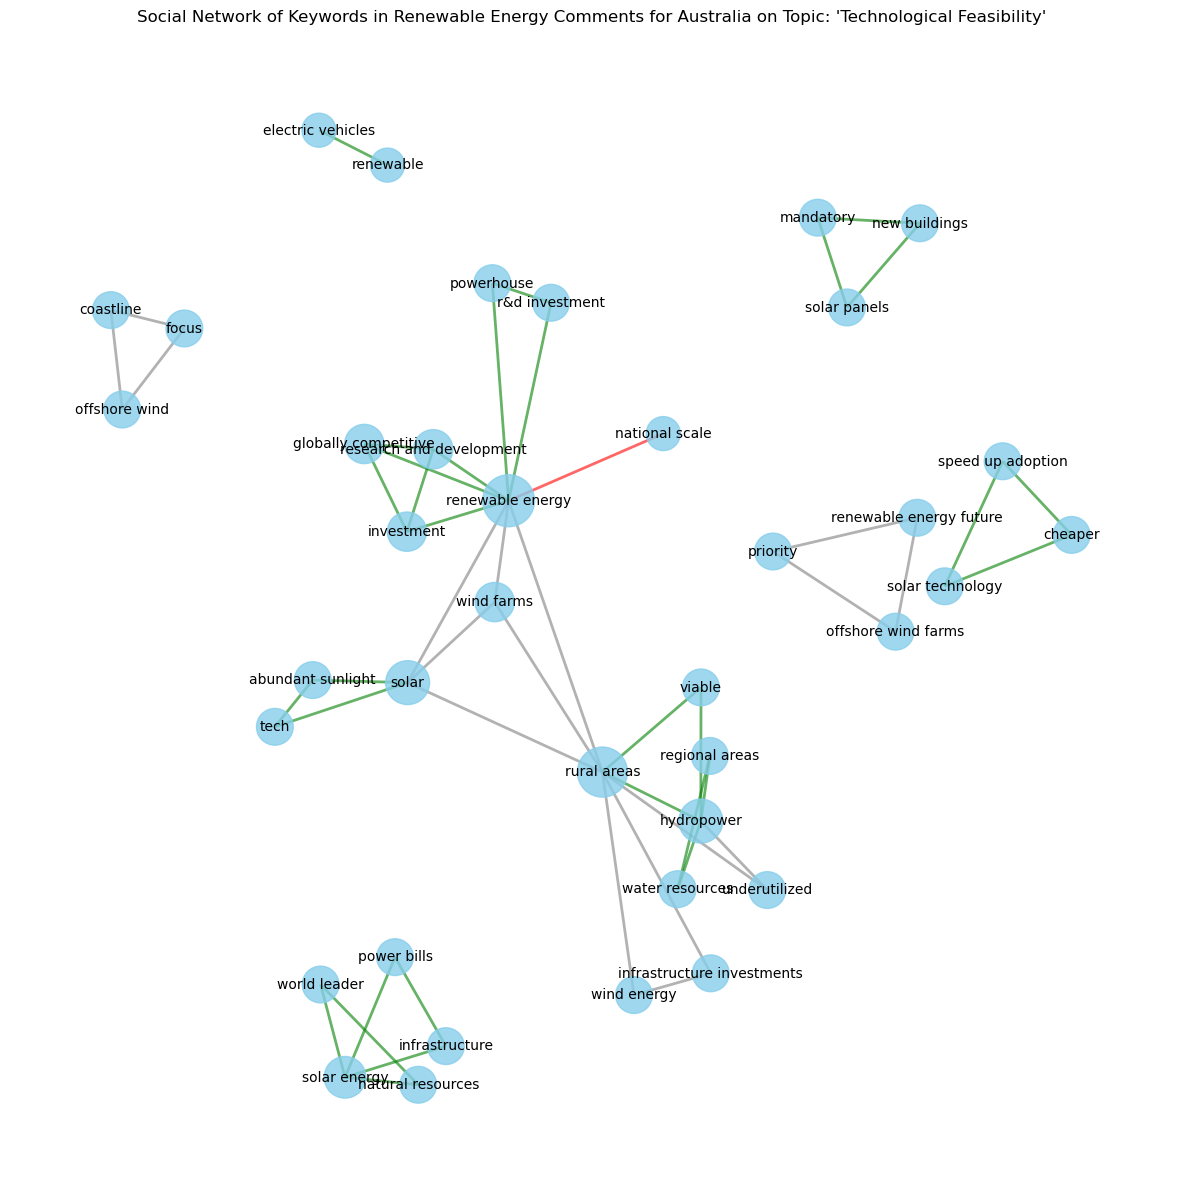

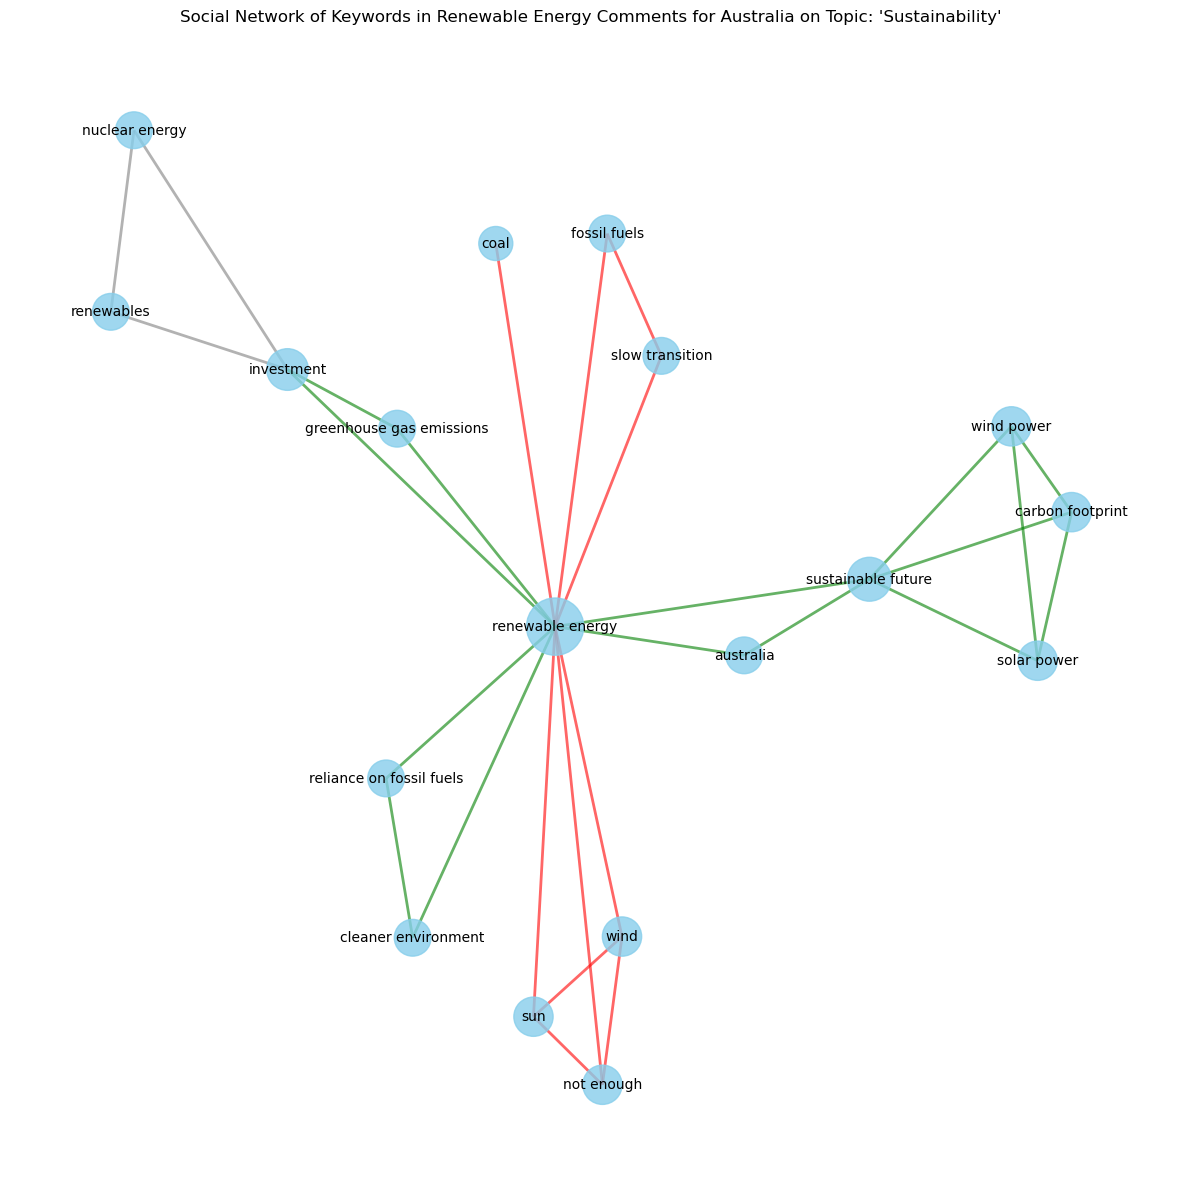

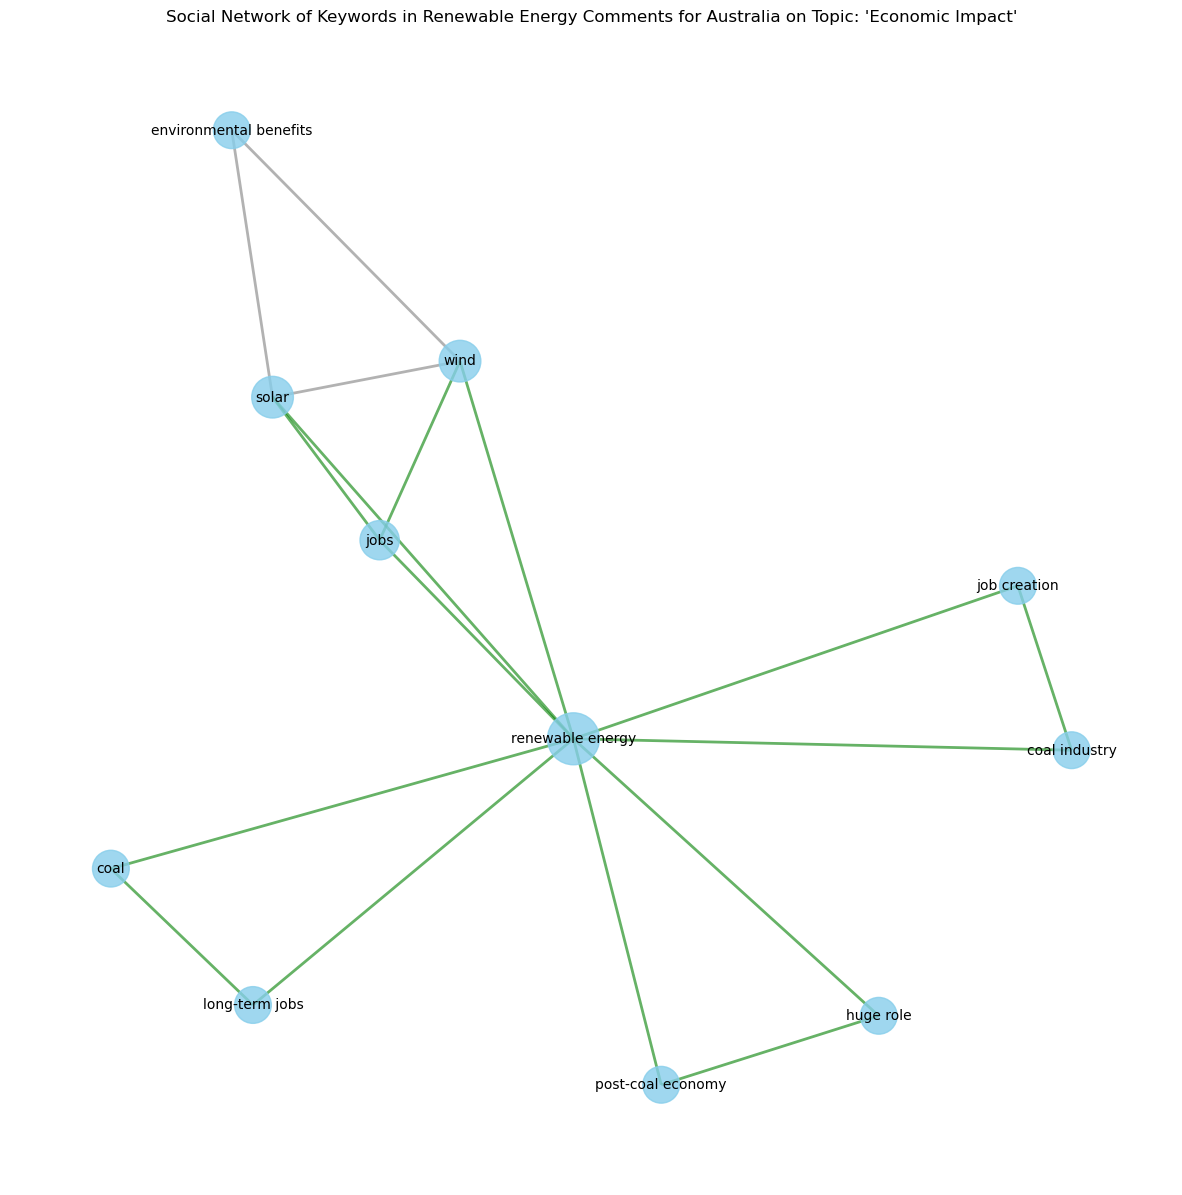

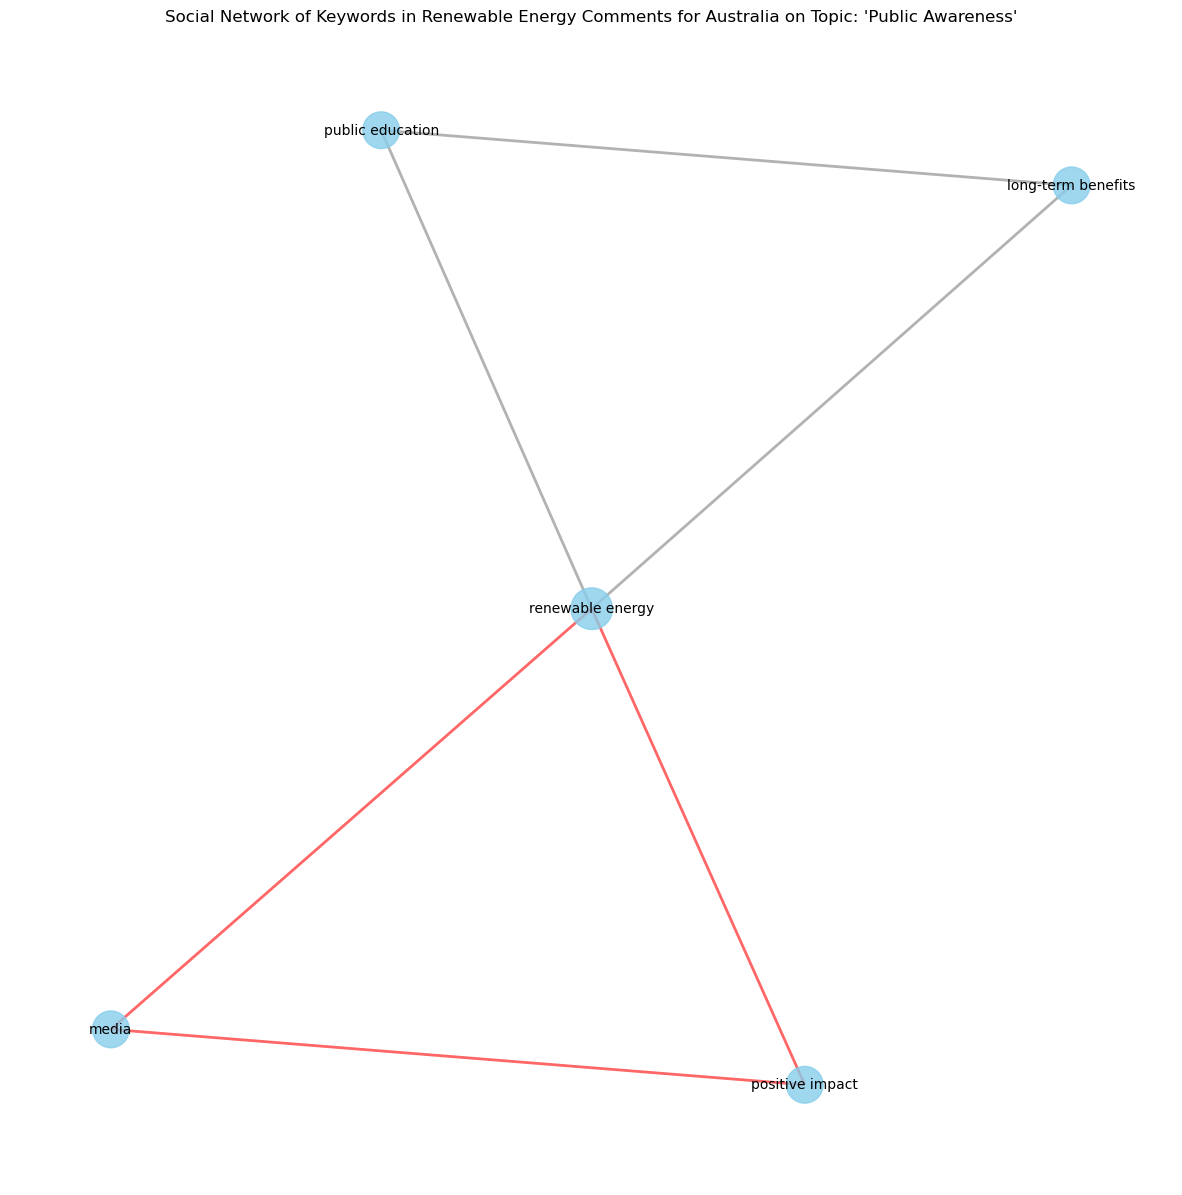

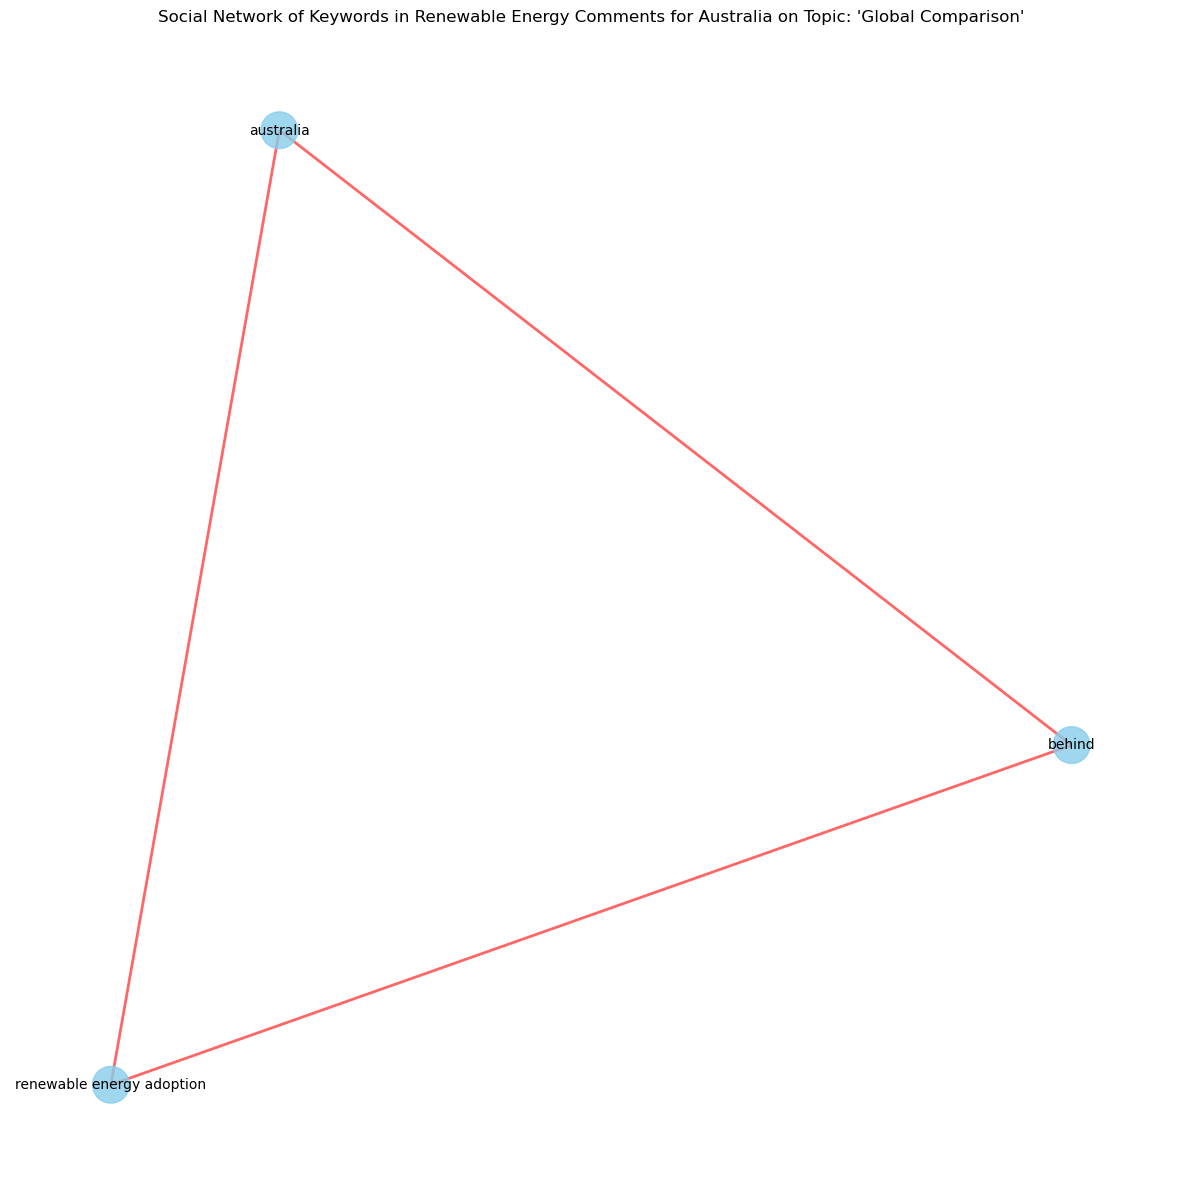

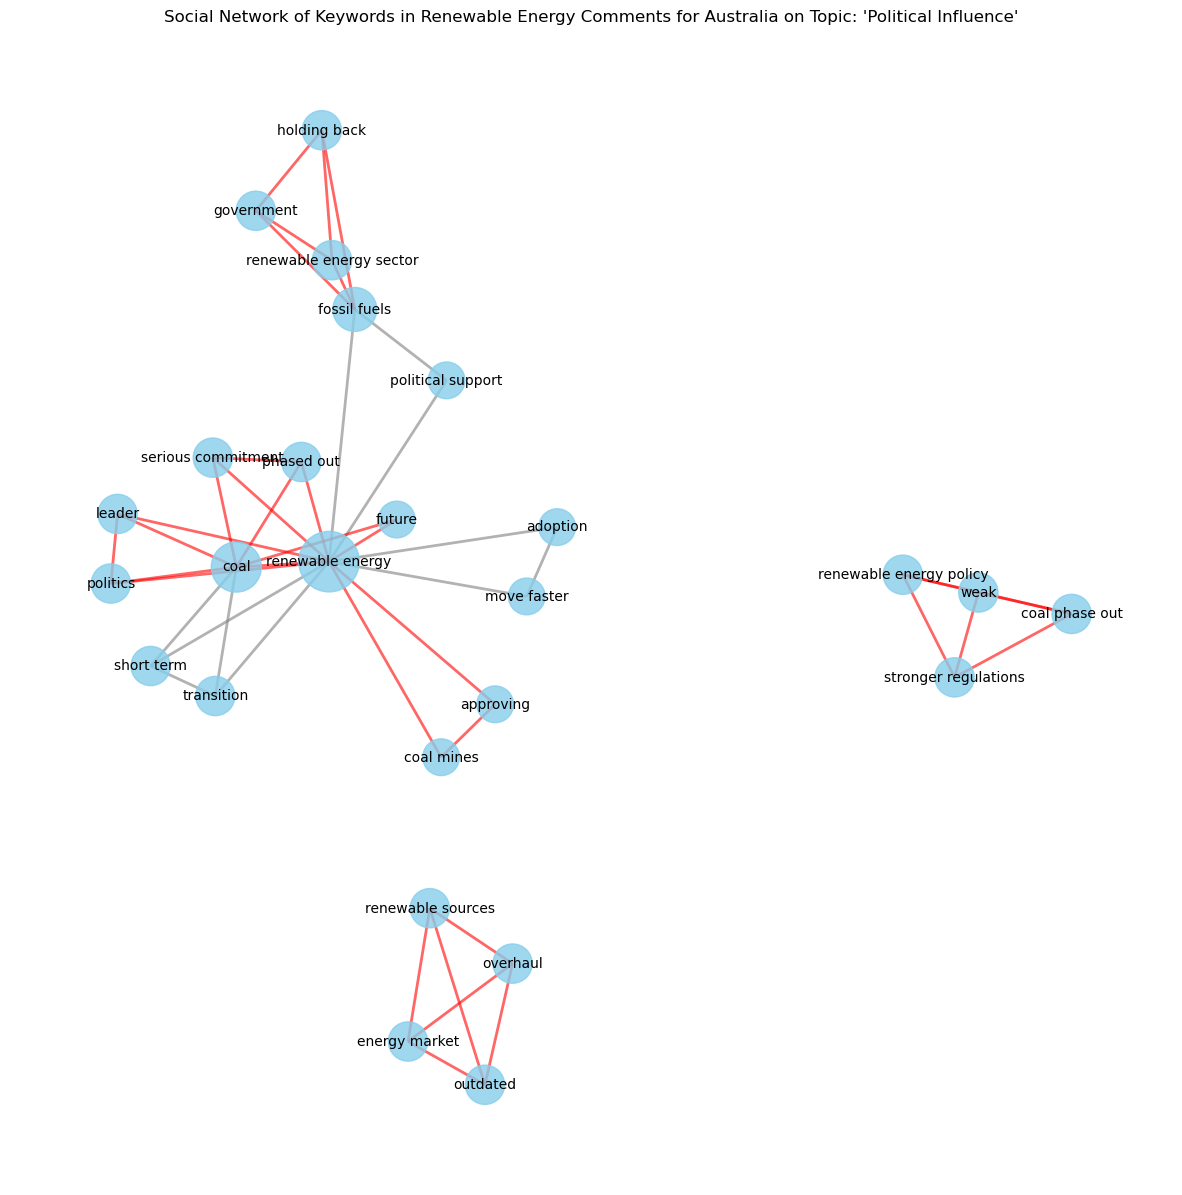

No data available for the topic: 'Energy Mix' in Australia. Skipping graph.
No data available for the topic: 'Government Initiatives' in Australia. Skipping graph.
No data available for the topic: 'Global Leadership' in Australia. Skipping graph.
No data available for the topic: 'Economic Growth vs. Sustainability' in Australia. Skipping graph.
No data available for the topic: 'Technological Progress' in Australia. Skipping graph.
No data available for the topic: 'Public Health' in Australia. Skipping graph.
No data available for the topic: 'Geographical Constraints' in Australia. Skipping graph.
No data available for the topic: 'Regional Leadership' in Australia. Skipping graph.
No data available for the topic: 'Energy Independence' in Australia. Skipping graph.
No data available for the topic: 'Regional Disparities' in Australia. Skipping graph.


In [161]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the dataset from Excel
file_path = 'Comment_topics.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Function to clean keywords
def clean_keywords(keyword_string):
    return [kw.strip().lower() for kw in keyword_string.split(',')]

# Apply keyword cleaning to the 'Keywords' column
df['Keywords'] = df['Keywords'].apply(clean_keywords)

# Function to create a social network graph with sentiment-based edges
def create_sentiment_network_graph(df, country, topic, weight_threshold=2, top_n_nodes=None):
    # Filter the DataFrame for the specified country and topic
    filtered_df = df[(df['Country'].str.lower() == country.lower()) & (df['Topic'] == topic)]

    # Check if there is data for the specified topic
    if filtered_df.empty:
        print(f"No data available for the topic: '{topic}' in {country.capitalize()}. Skipping graph.")
        return

    # Initialize a network graph
    G = nx.Graph()

    # Add nodes and edges based on co-occurrence of keywords in each comment, with sentiment
    for _, row in filtered_df.iterrows():
        keywords = row['Keywords']
        sentiment = row['Sentiment'].lower()  # Get the sentiment of the comment

        # Create edges between all pairs of keywords within the same comment
        for kw1, kw2 in combinations(keywords, 2):
            if G.has_edge(kw1, kw2):
                G[kw1][kw2]['weight'] += 1  # Increment weight if the edge already exists
            else:
                # Initialize the edge with sentiment
                G.add_edge(kw1, kw2, weight=1, sentiment=sentiment)

    # Remove edges below the weight threshold
    G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold])

    # Optionally filter to keep only the top N most connected nodes
    if top_n_nodes:
        degrees = dict(G.degree())
        top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_n_nodes]
        G = G.subgraph(top_nodes).copy()

    # Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))

    # Draw the network graph
    plt.figure(figsize=(15, 15))

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Get edge colors based on sentiment
    edge_colors = []
    for u, v, d in G.edges(data=True):
        if d['sentiment'] == 'positive':
            edge_colors.append('green')
        elif d['sentiment'] == 'negative':
            edge_colors.append('red')
        else:
            edge_colors.append('gray')  # Neutral sentiment

    # Draw nodes
    node_sizes = [500 + (len(list(G.neighbors(n))) * 100) for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)

    # Draw edges with sentiment-based colors
    nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors, alpha=0.6)

    # Add labels to nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Display the graph
    plt.title(f"Social Network of Keywords in Renewable Energy Comments for {country.capitalize()} on Topic: '{topic}'")
    plt.axis('off')
    plt.show()

# Example usage: create separate graphs for each topic
country = 'Australia'  # Specify the country
topics = df['Topic'].unique()  # Get unique topics

for topic in topics:
    create_sentiment_network_graph(df, country, topic, weight_threshold=0, top_n_nodes=300)


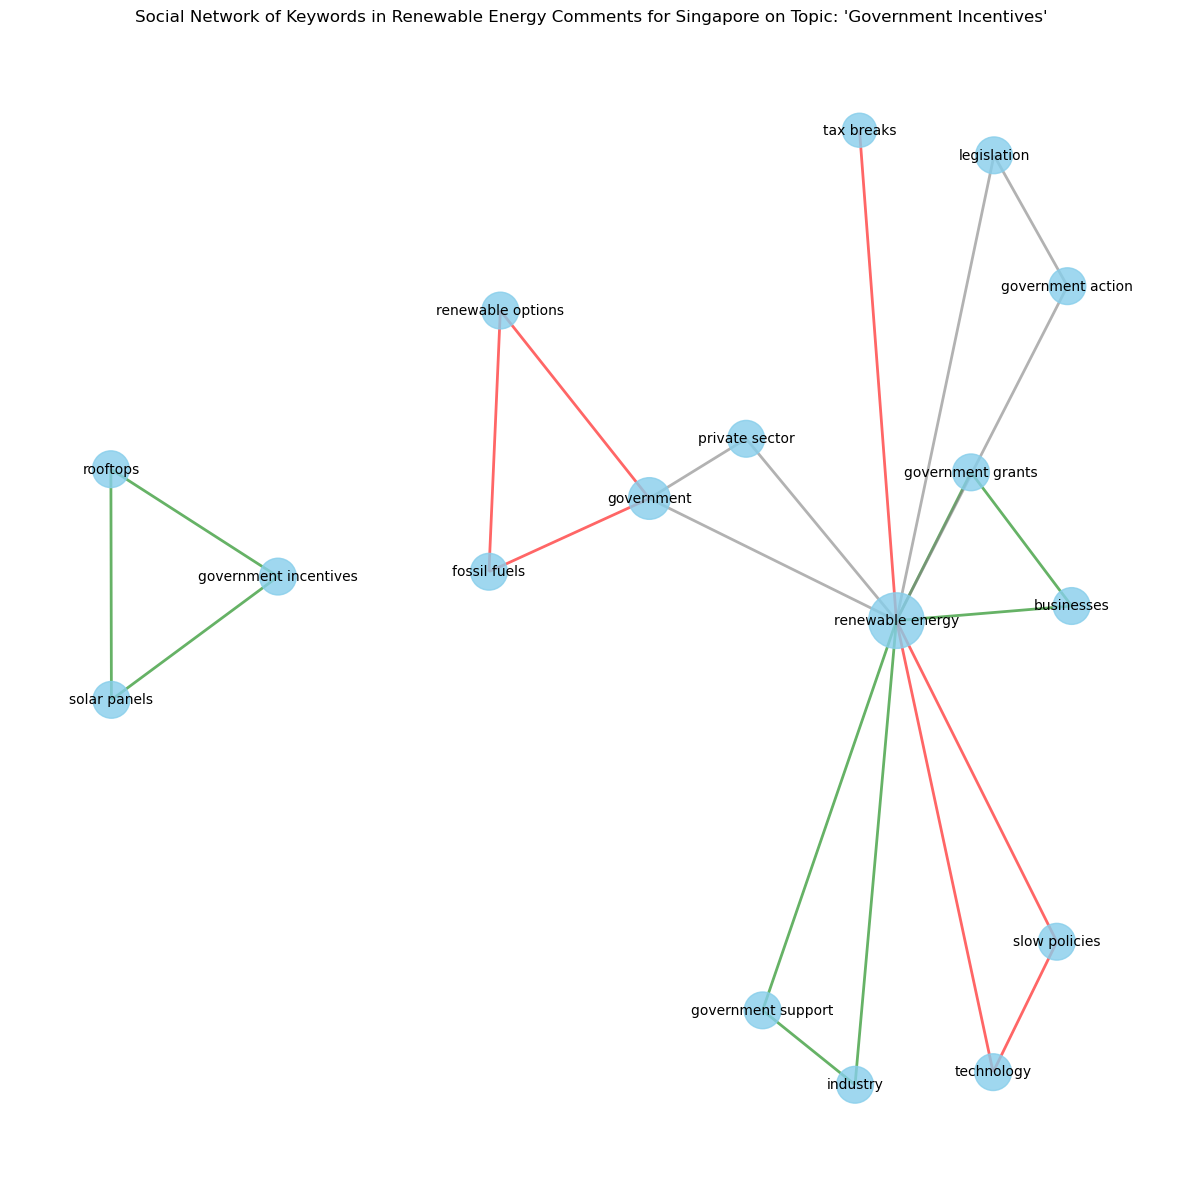

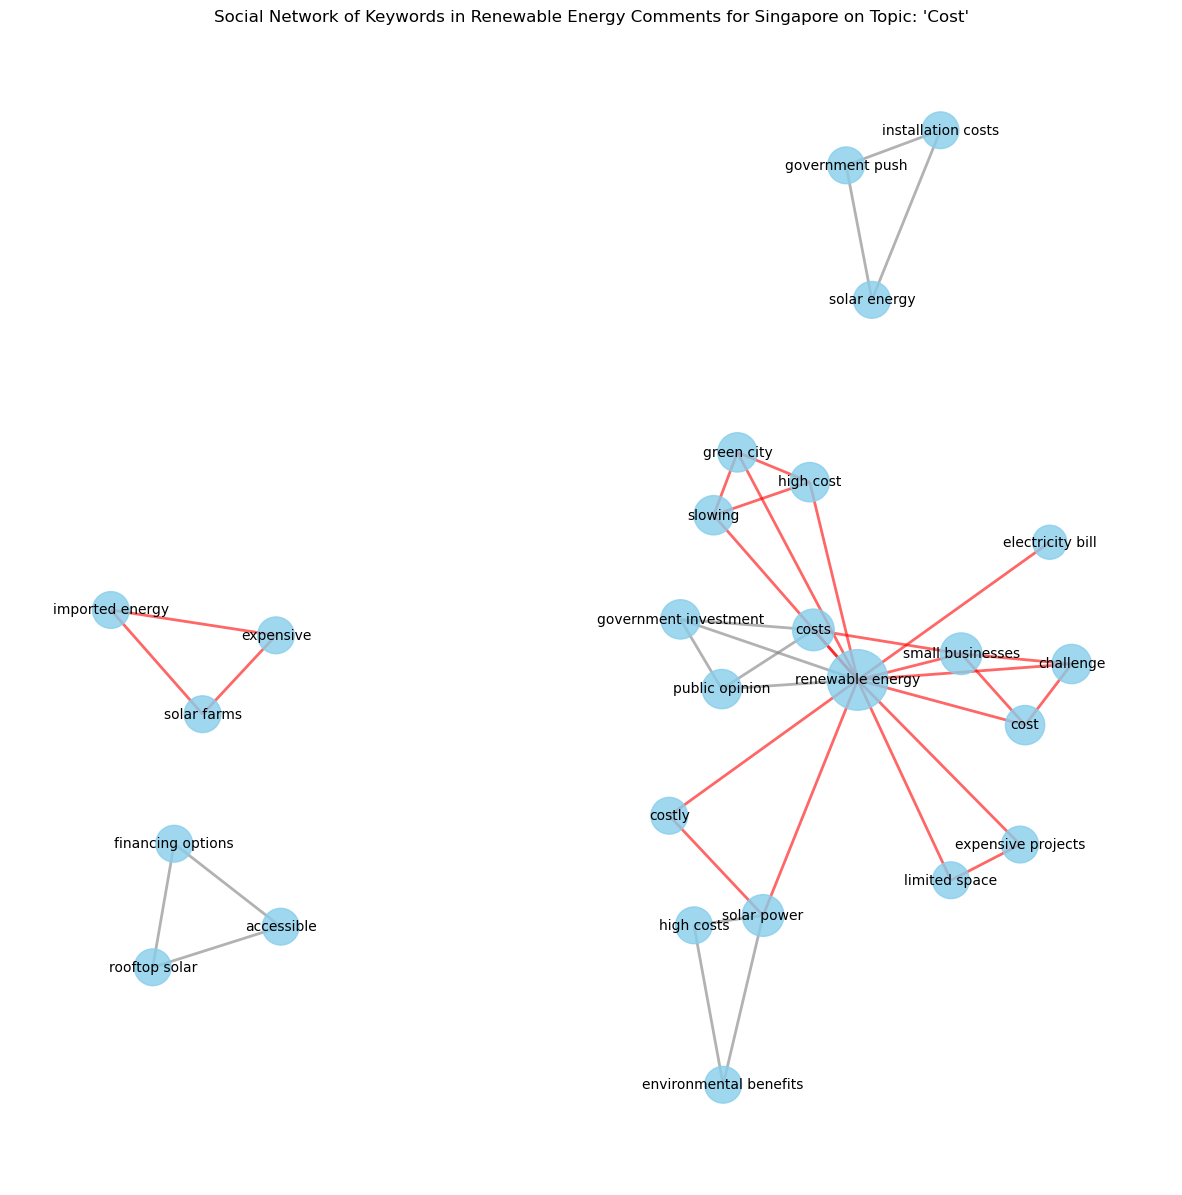

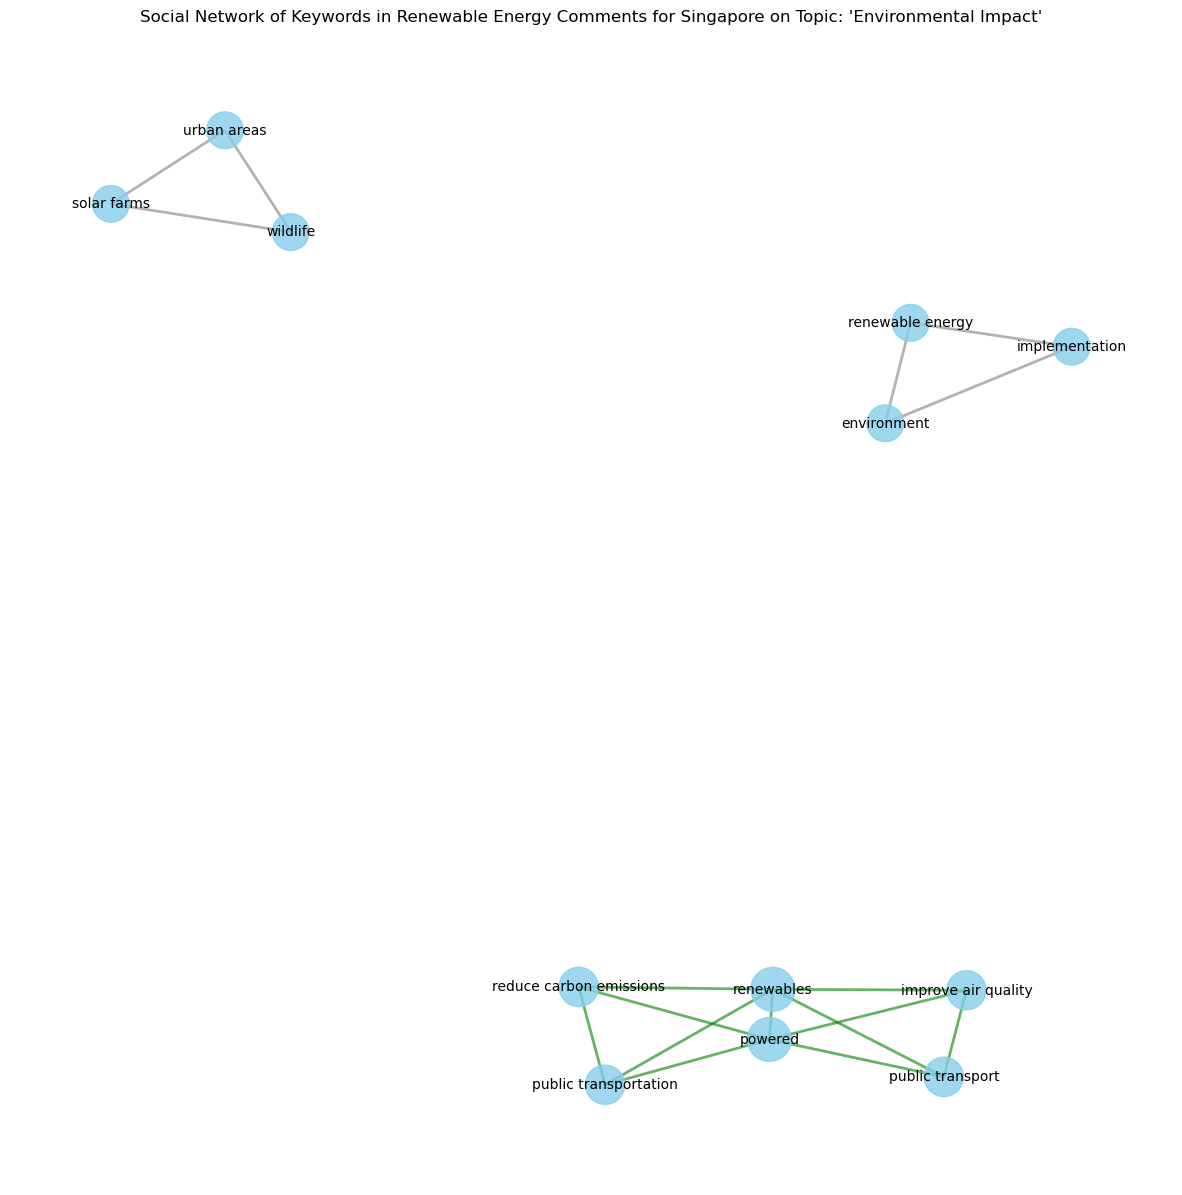

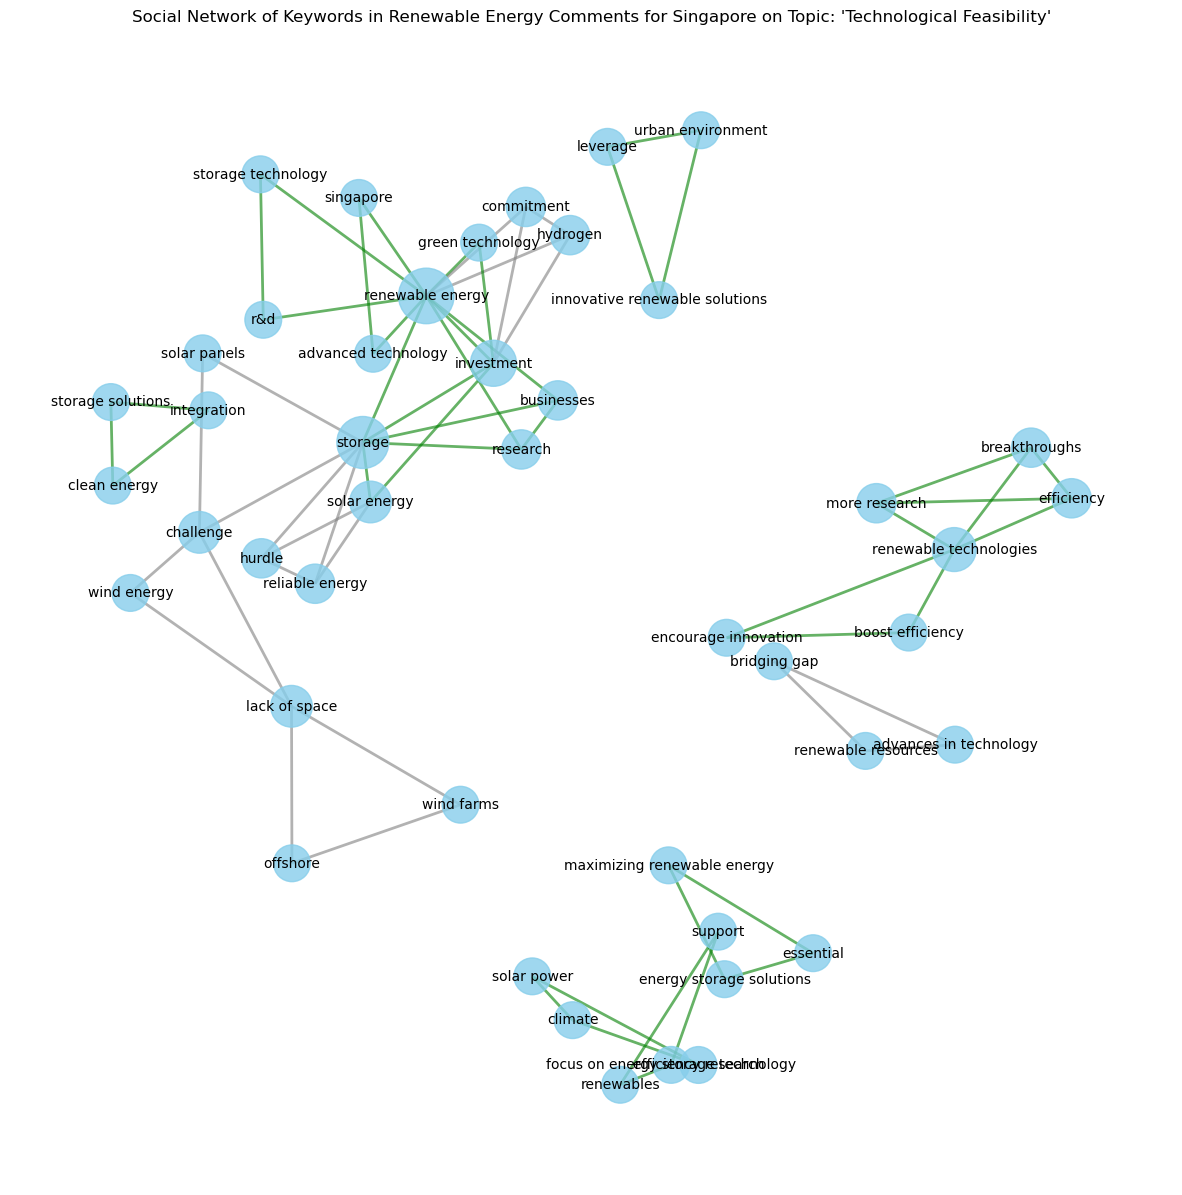

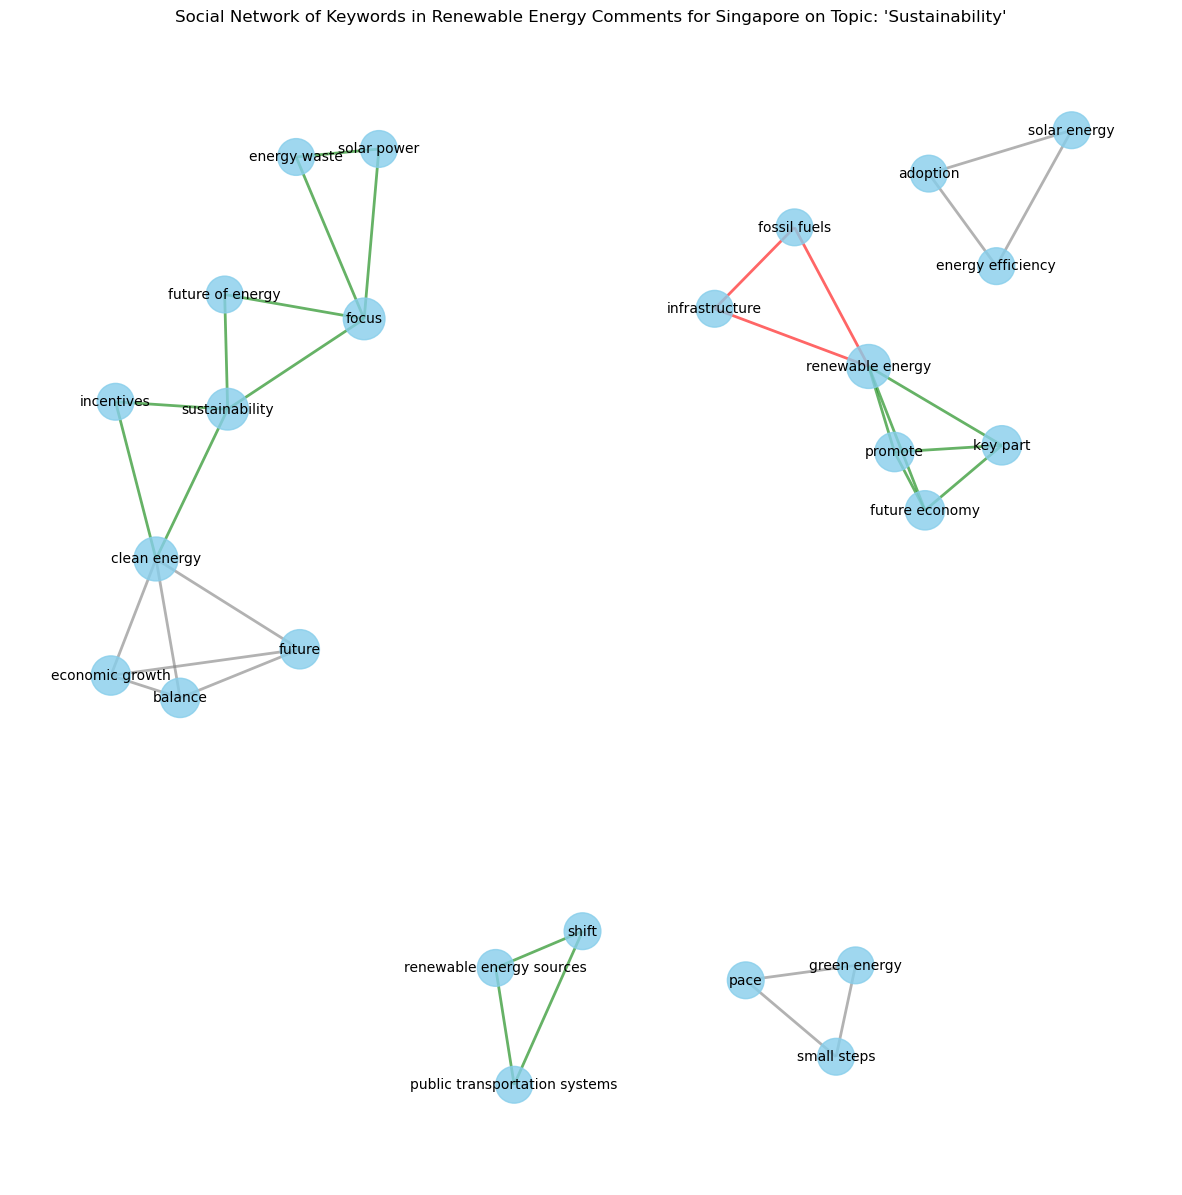

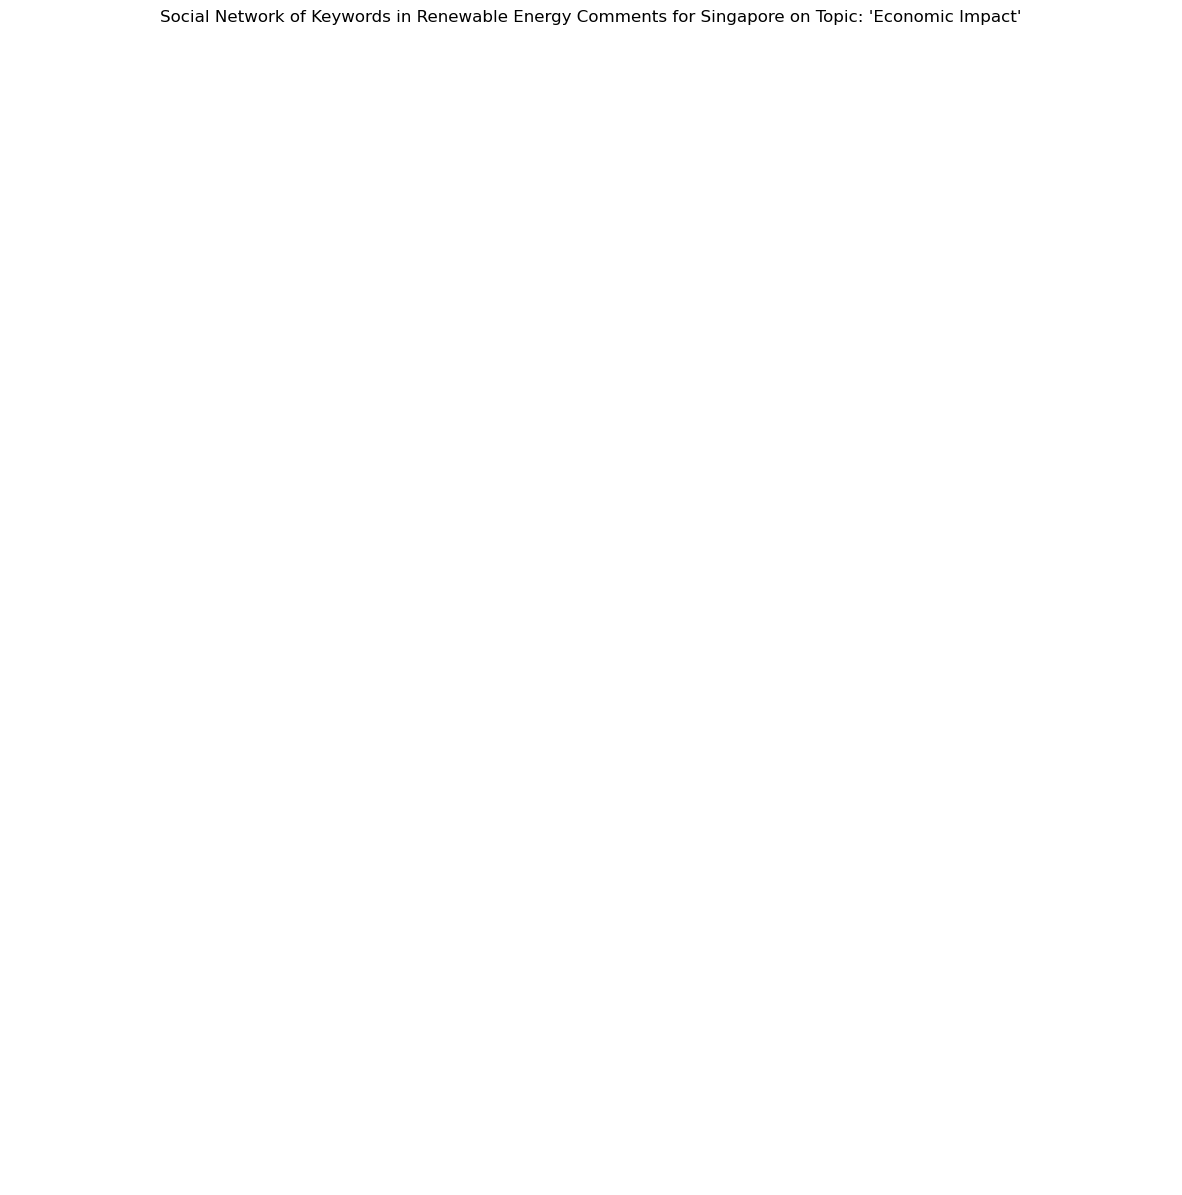

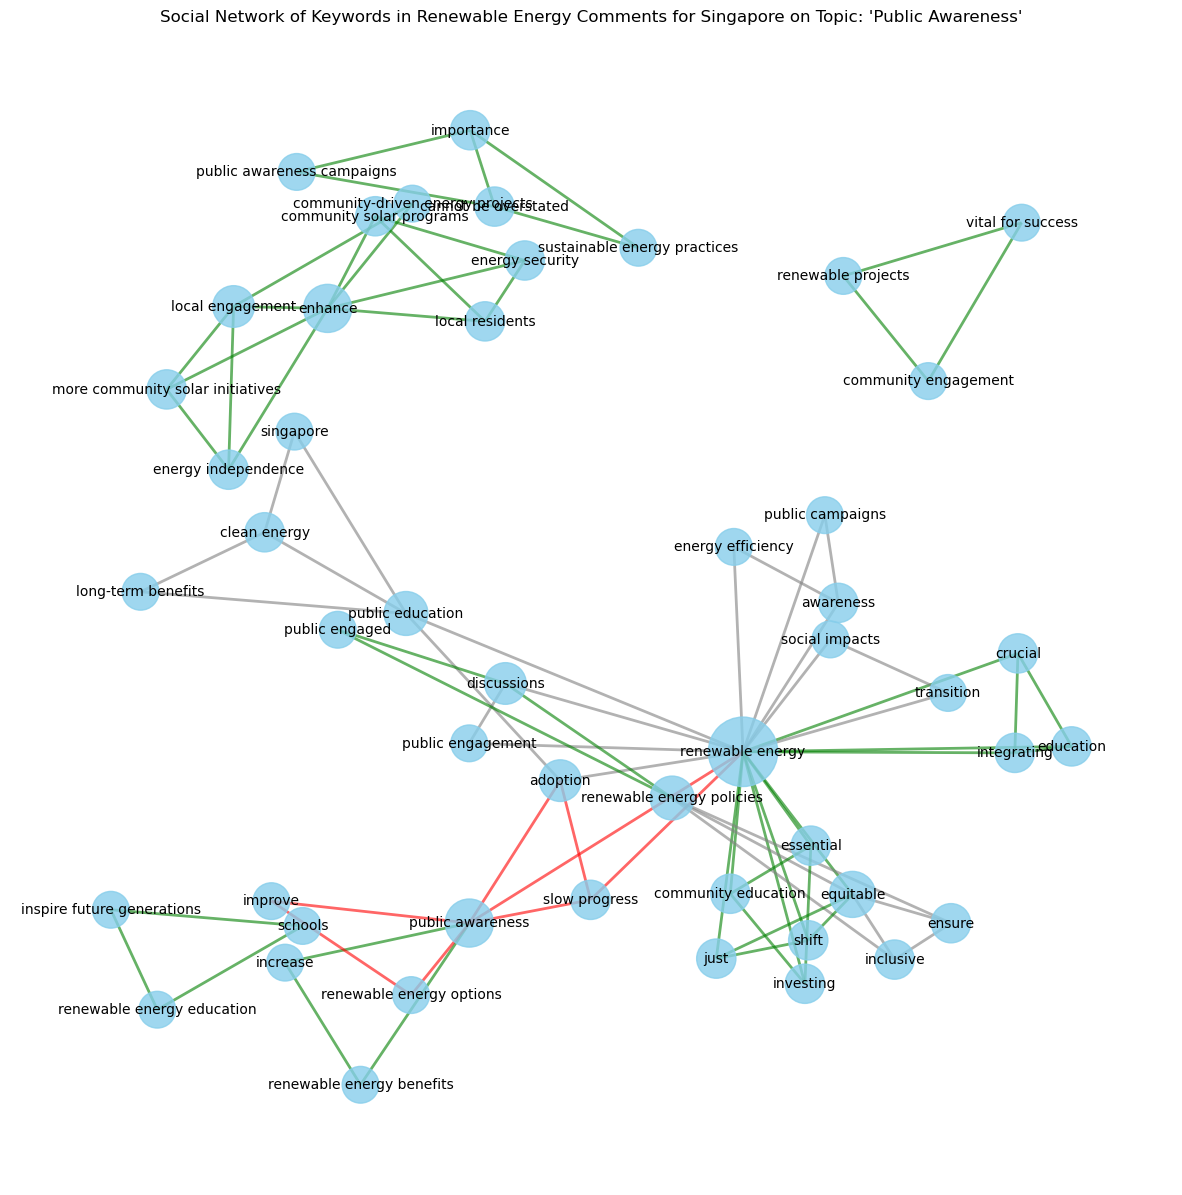

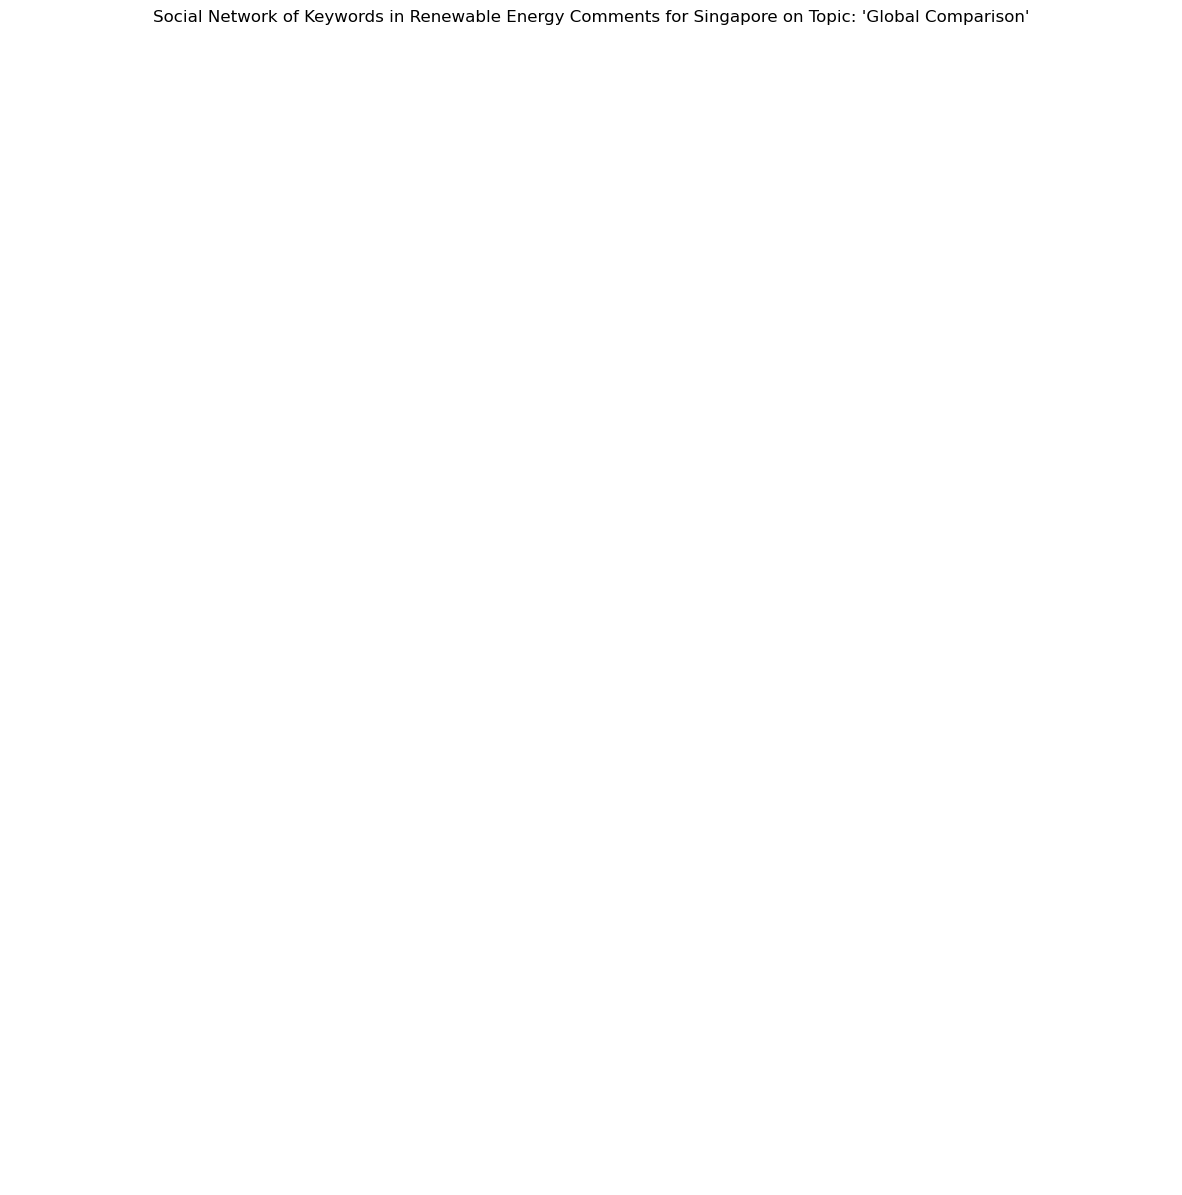

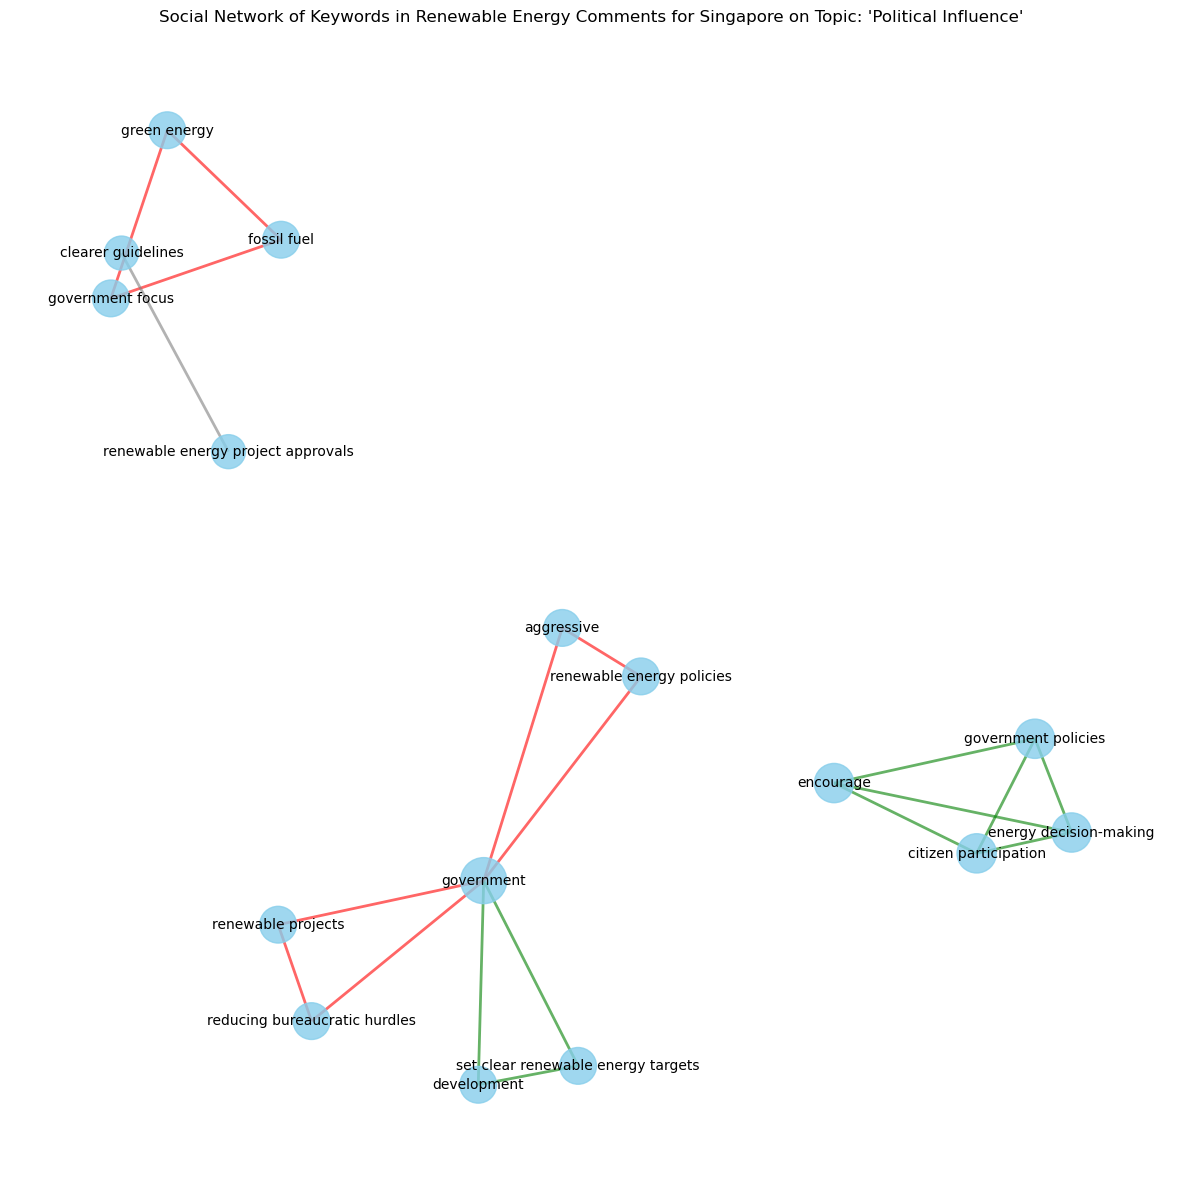

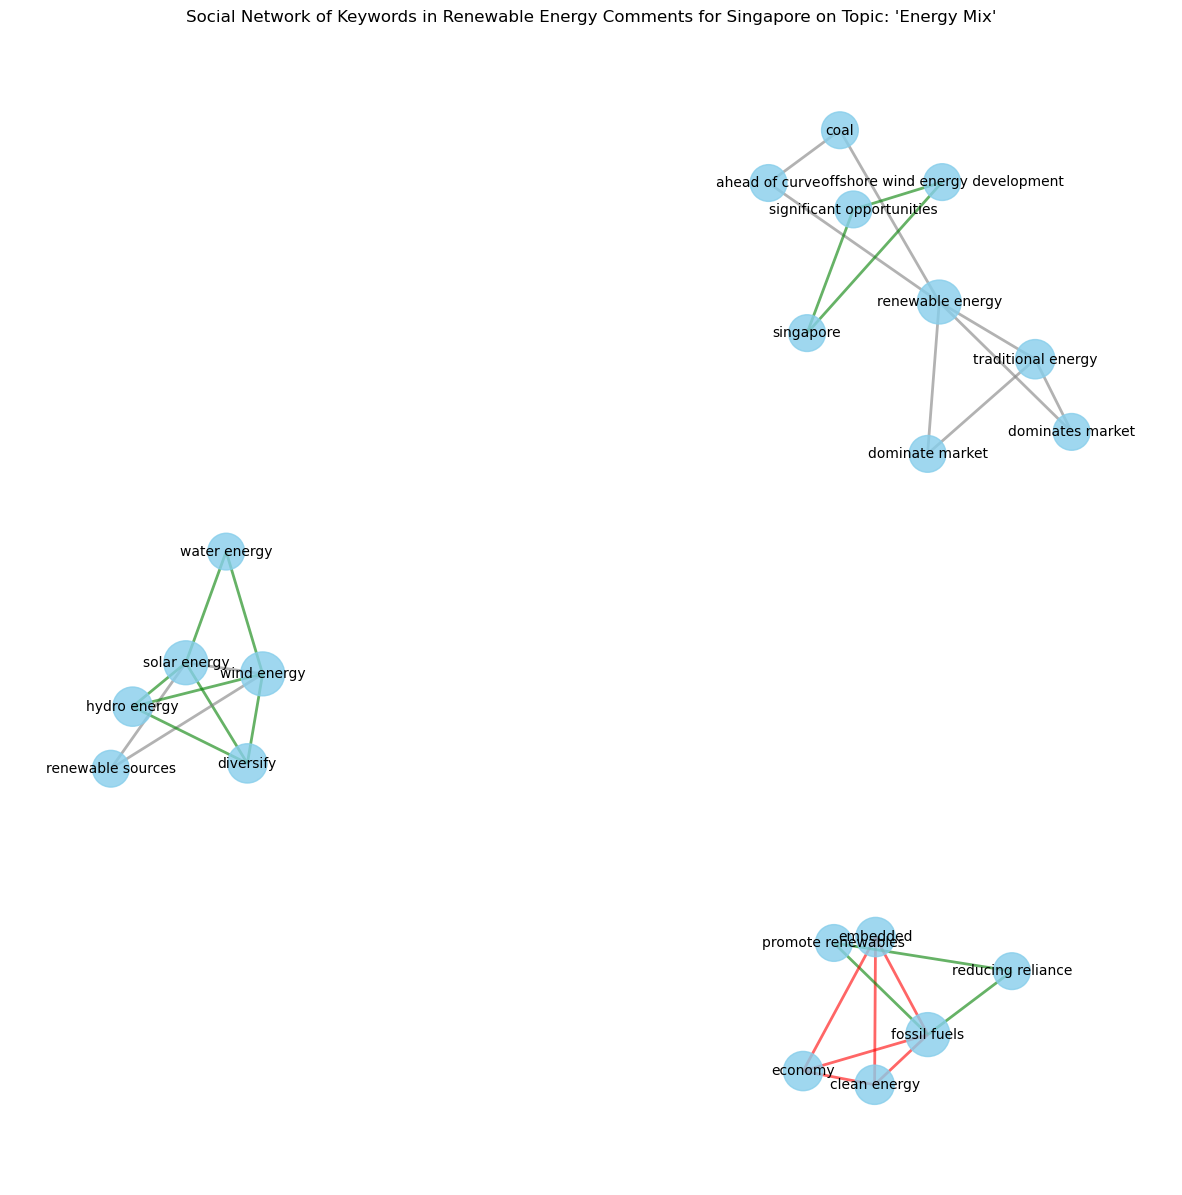

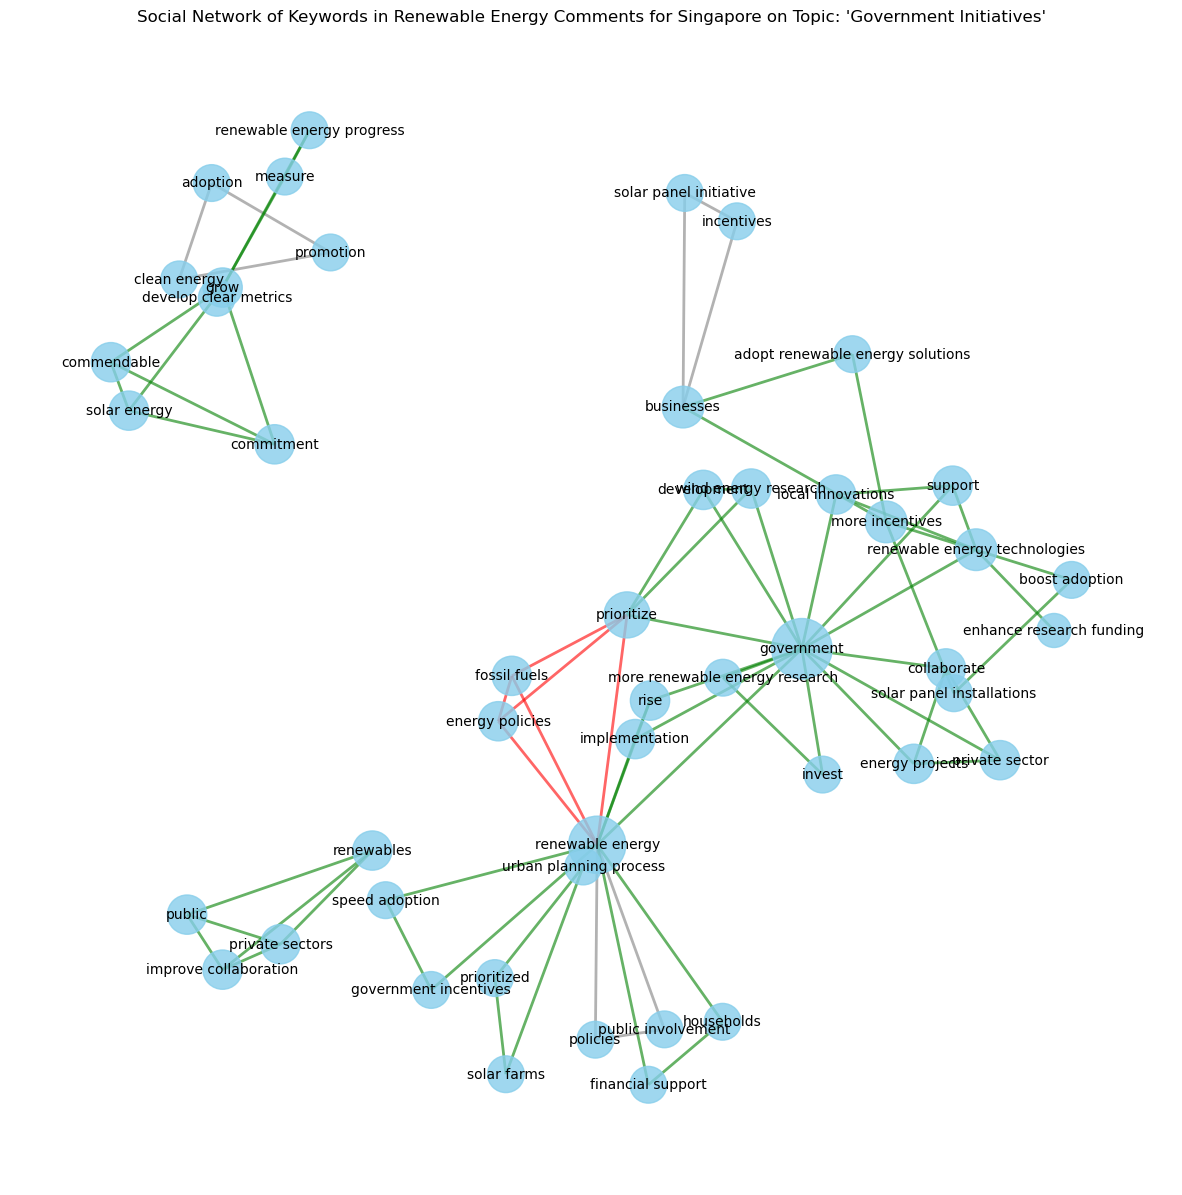

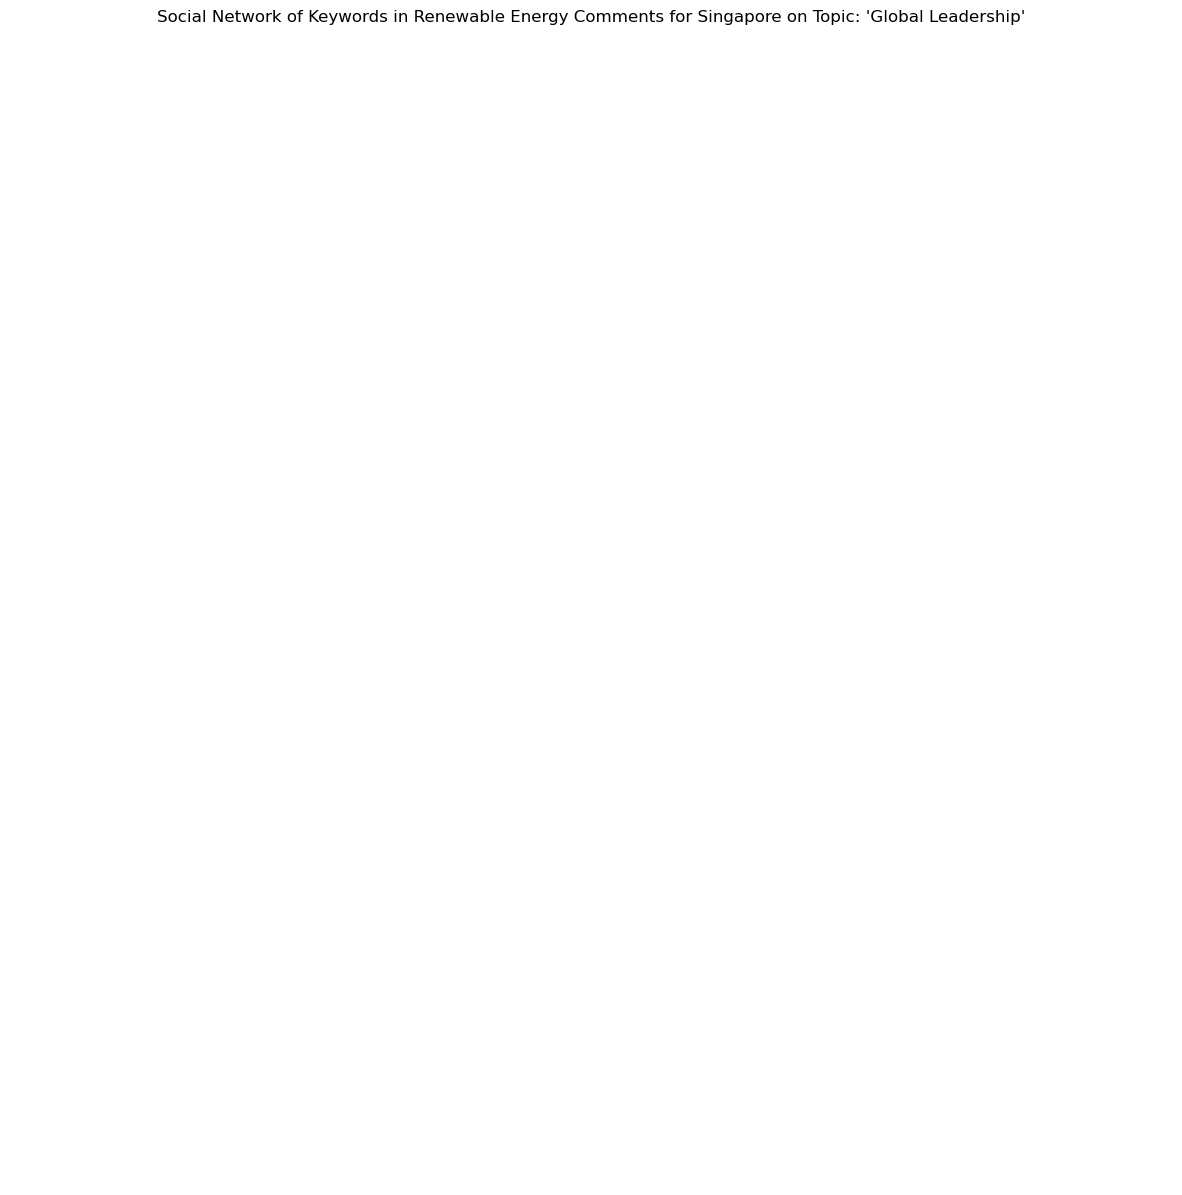

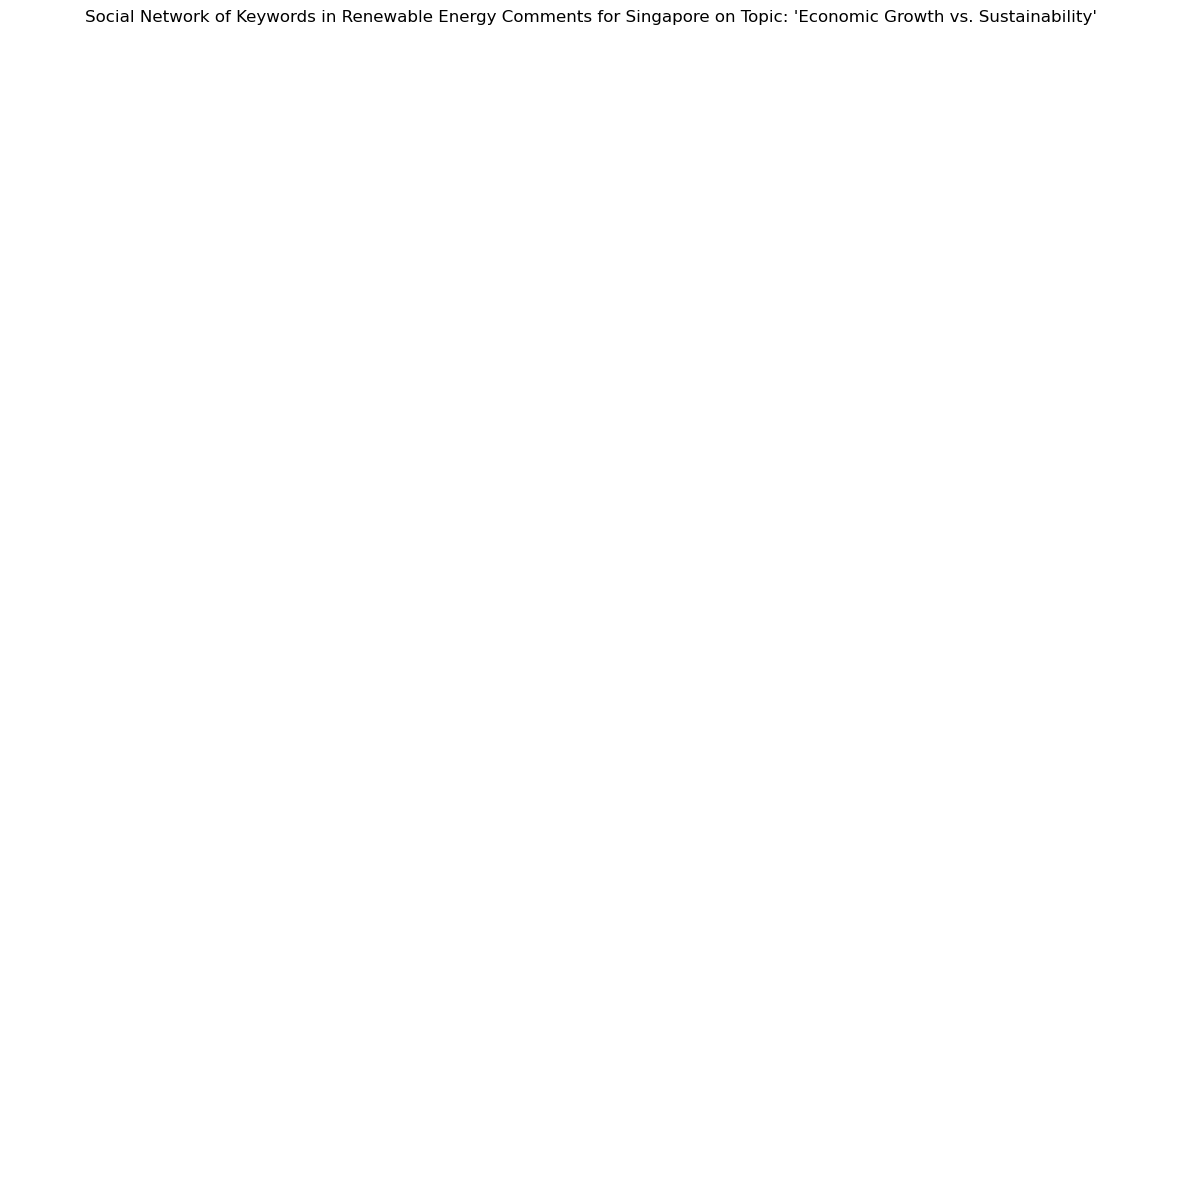

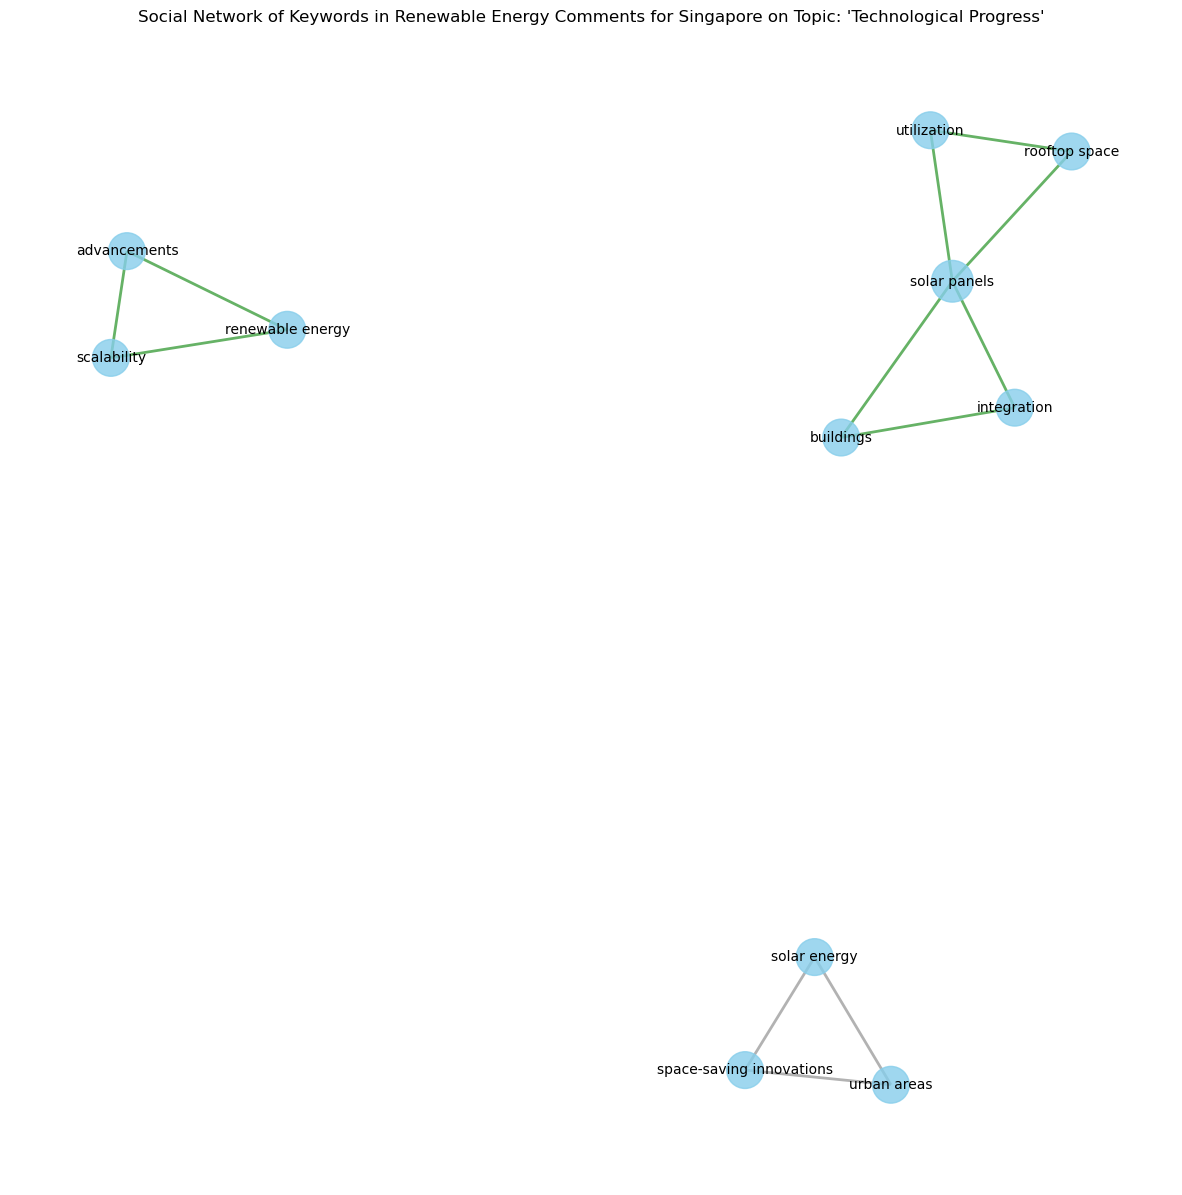

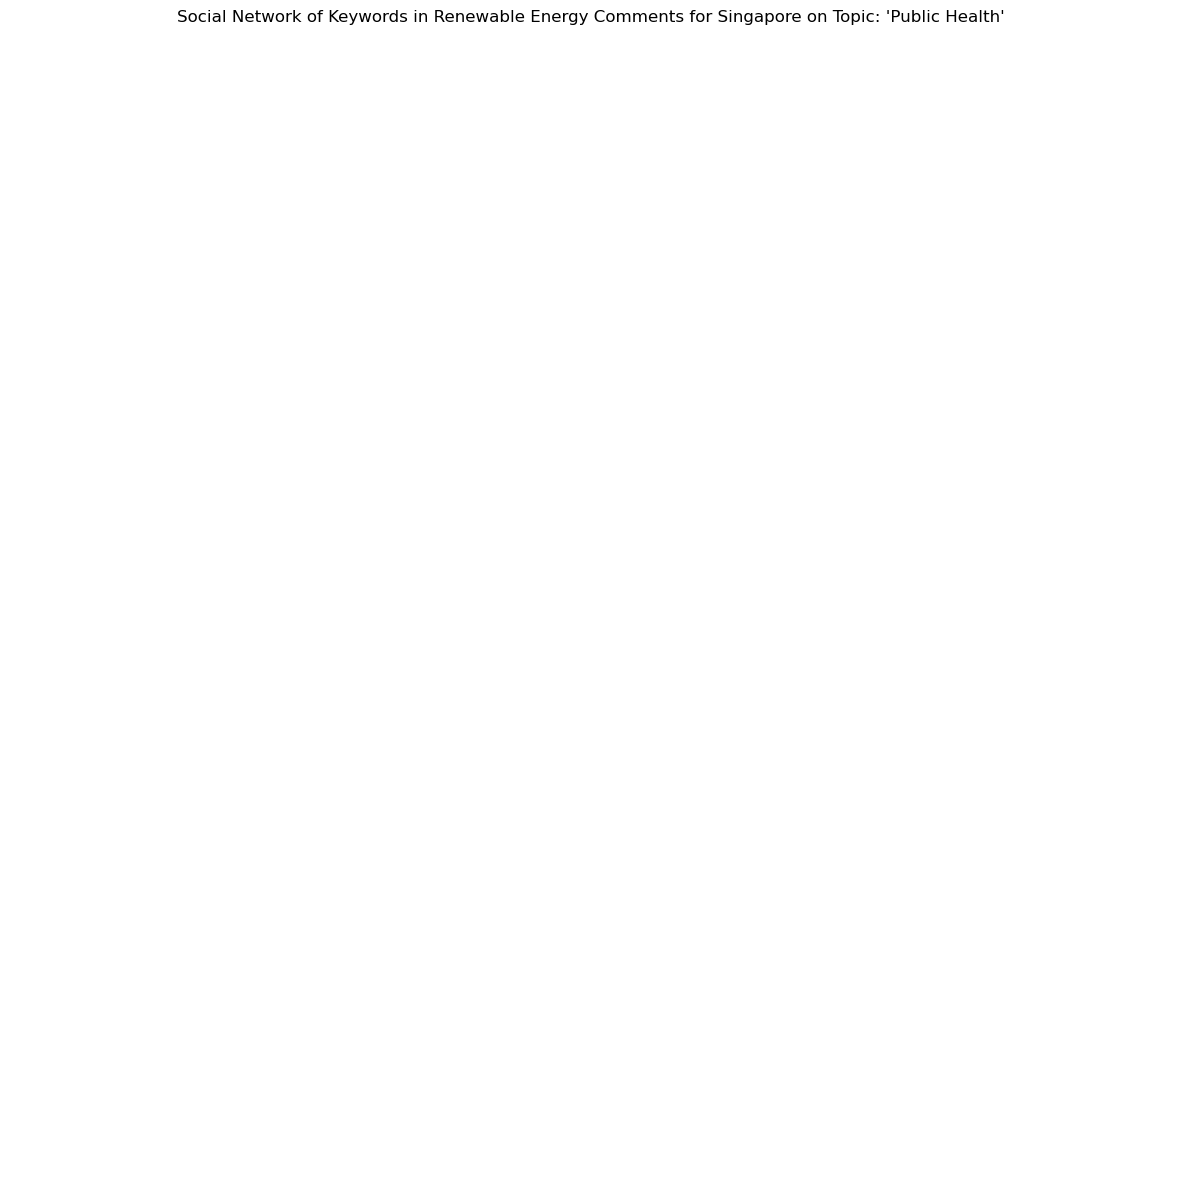

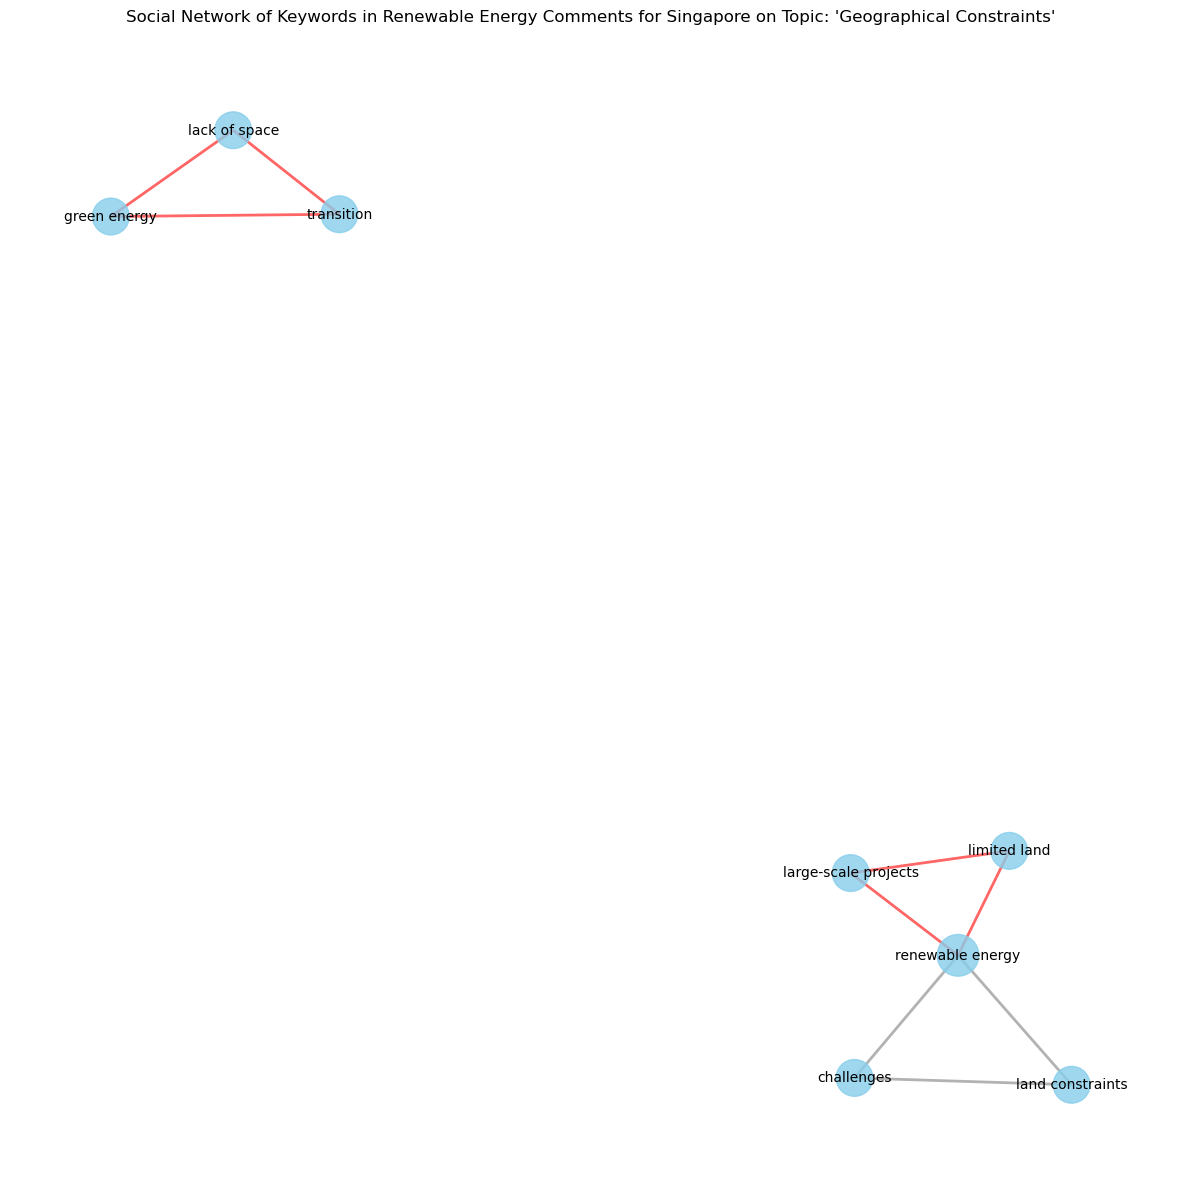

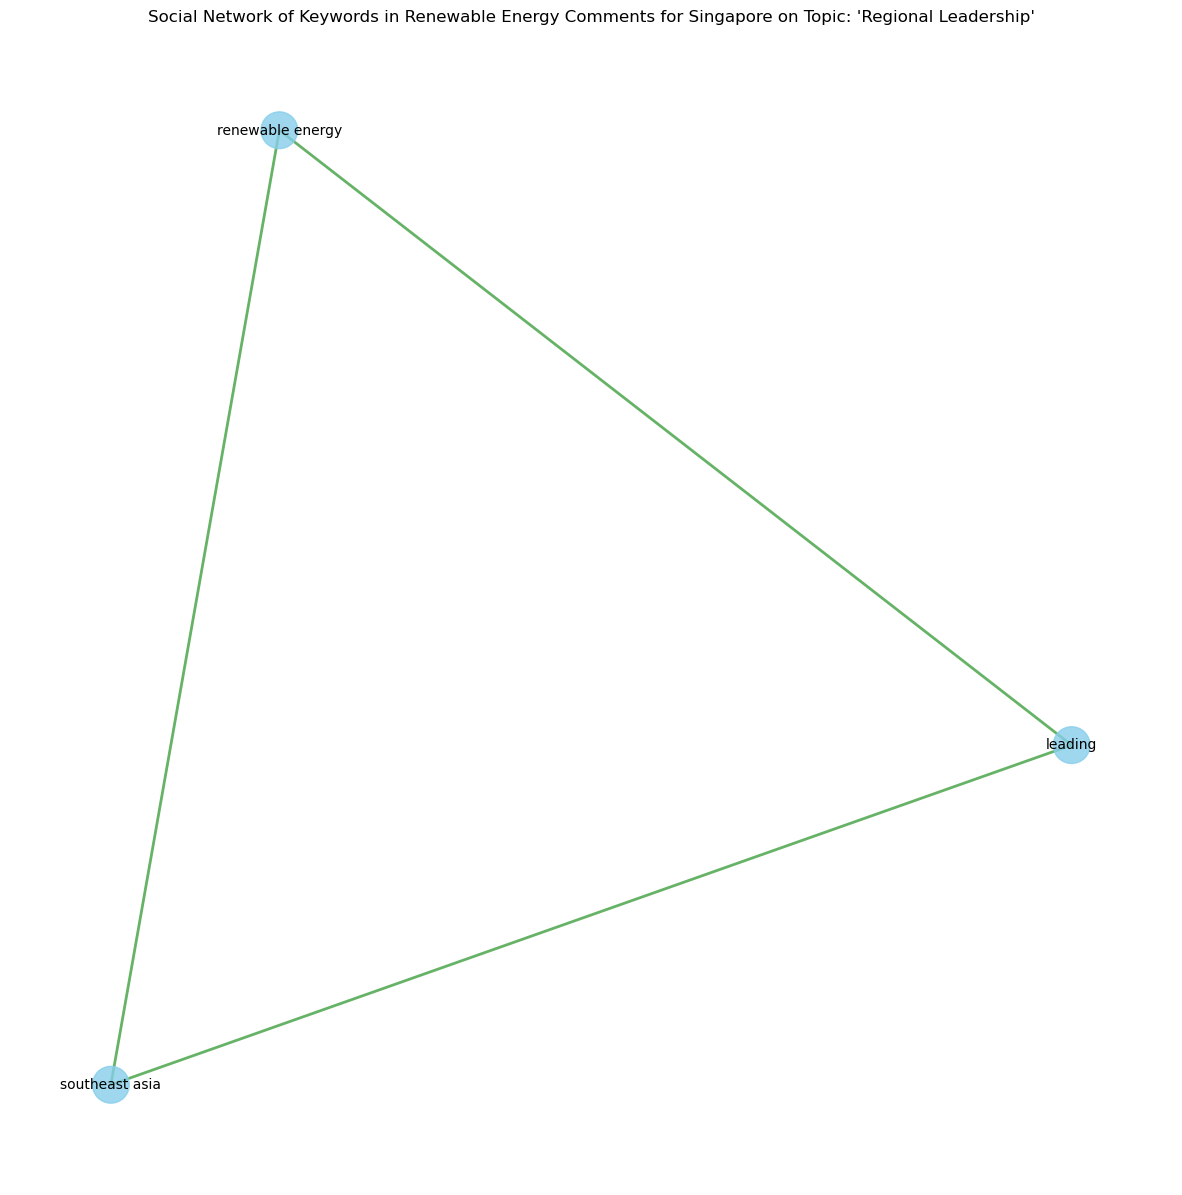

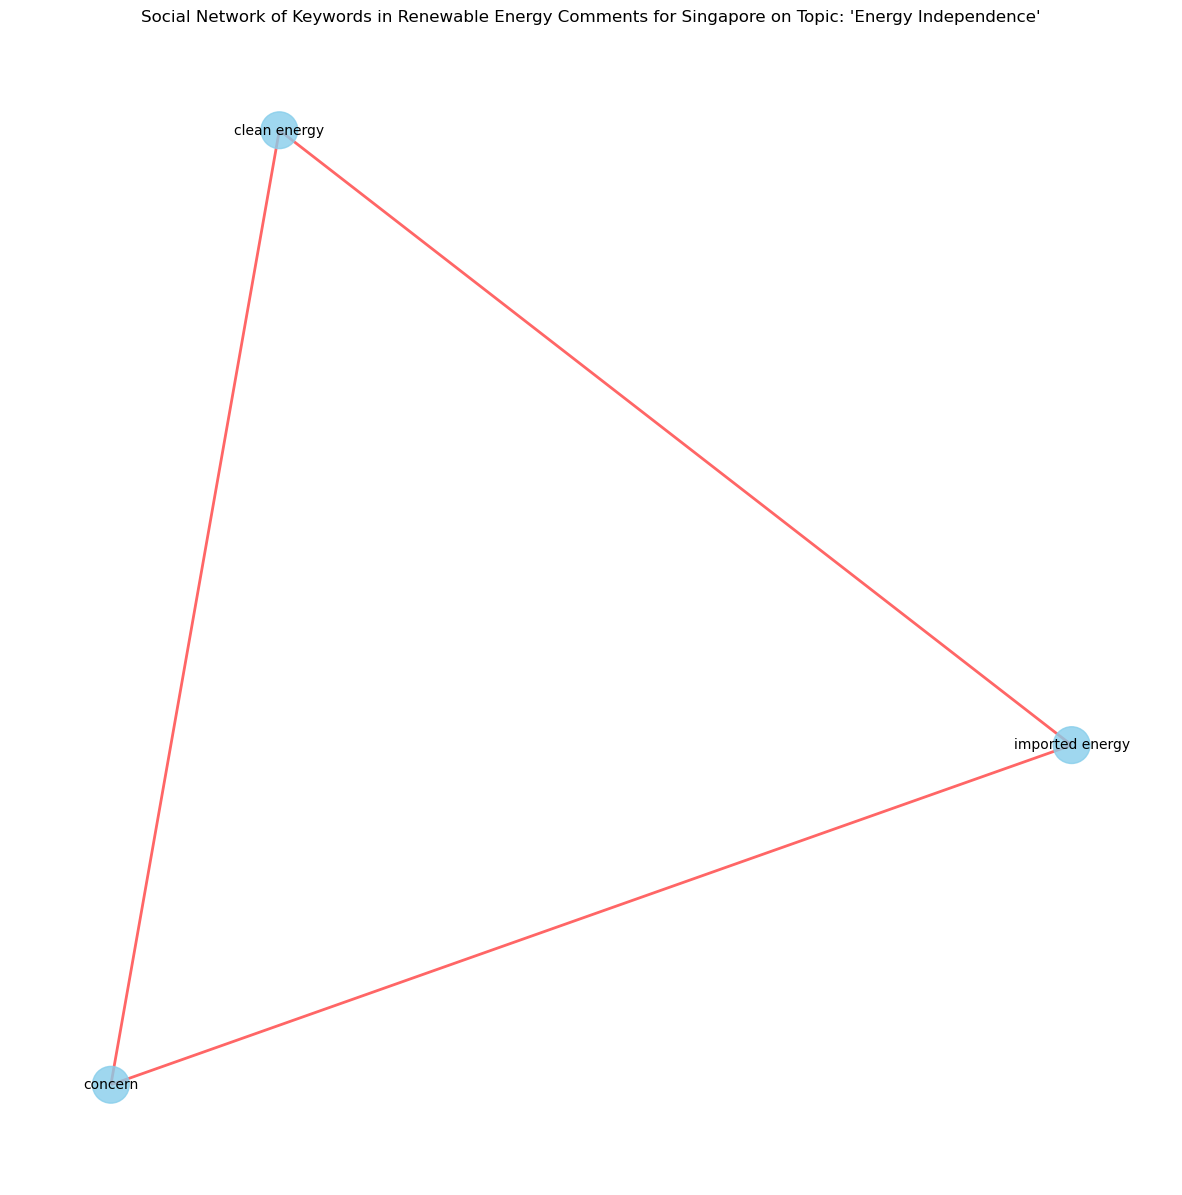

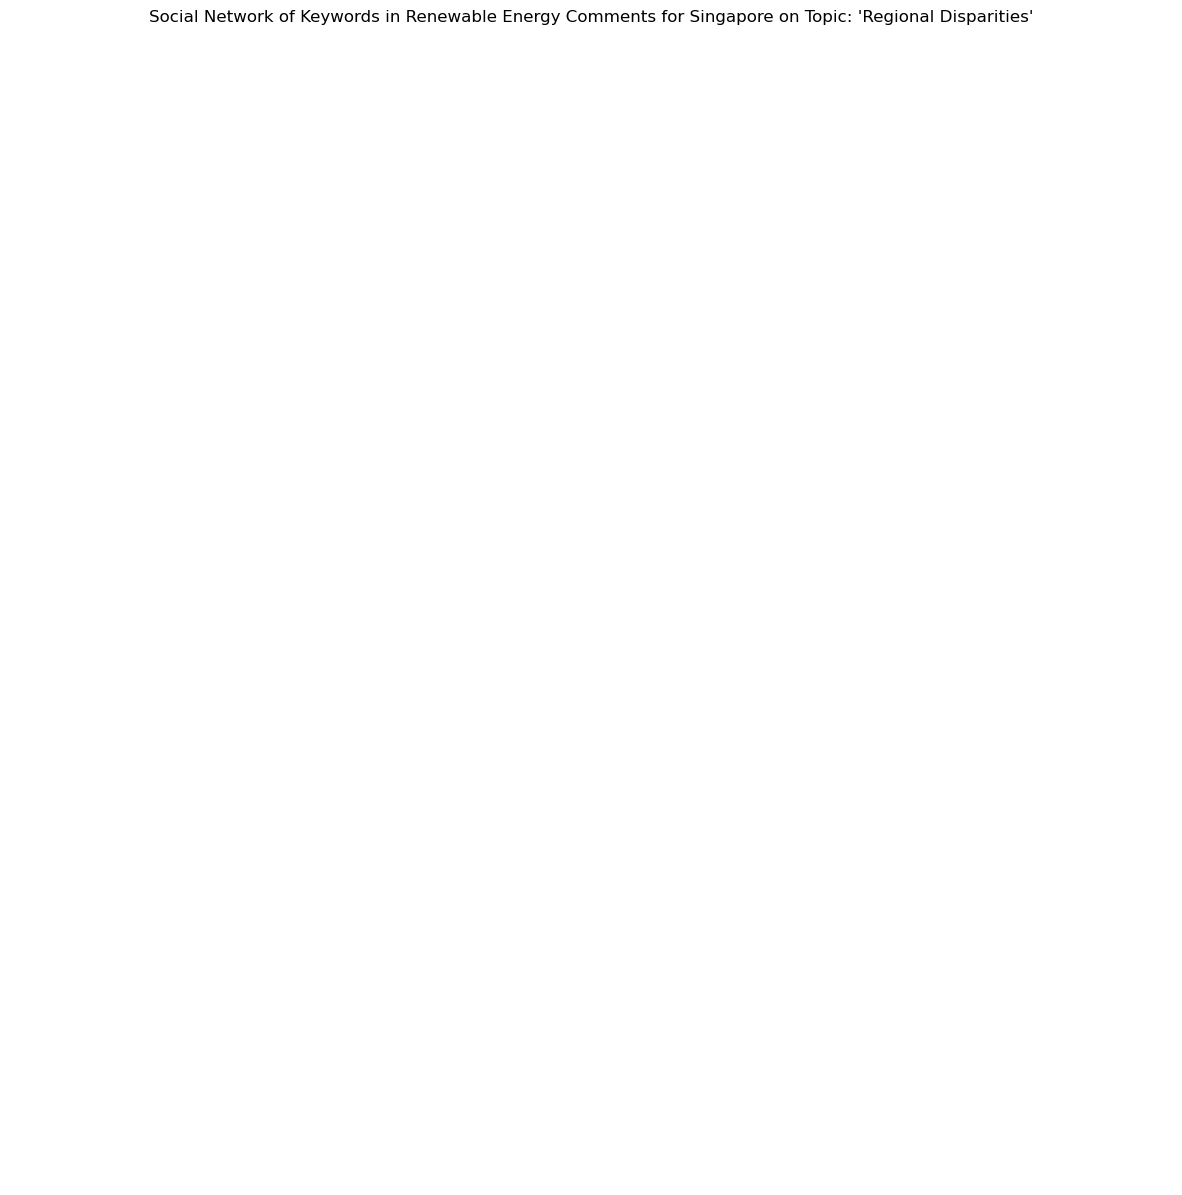

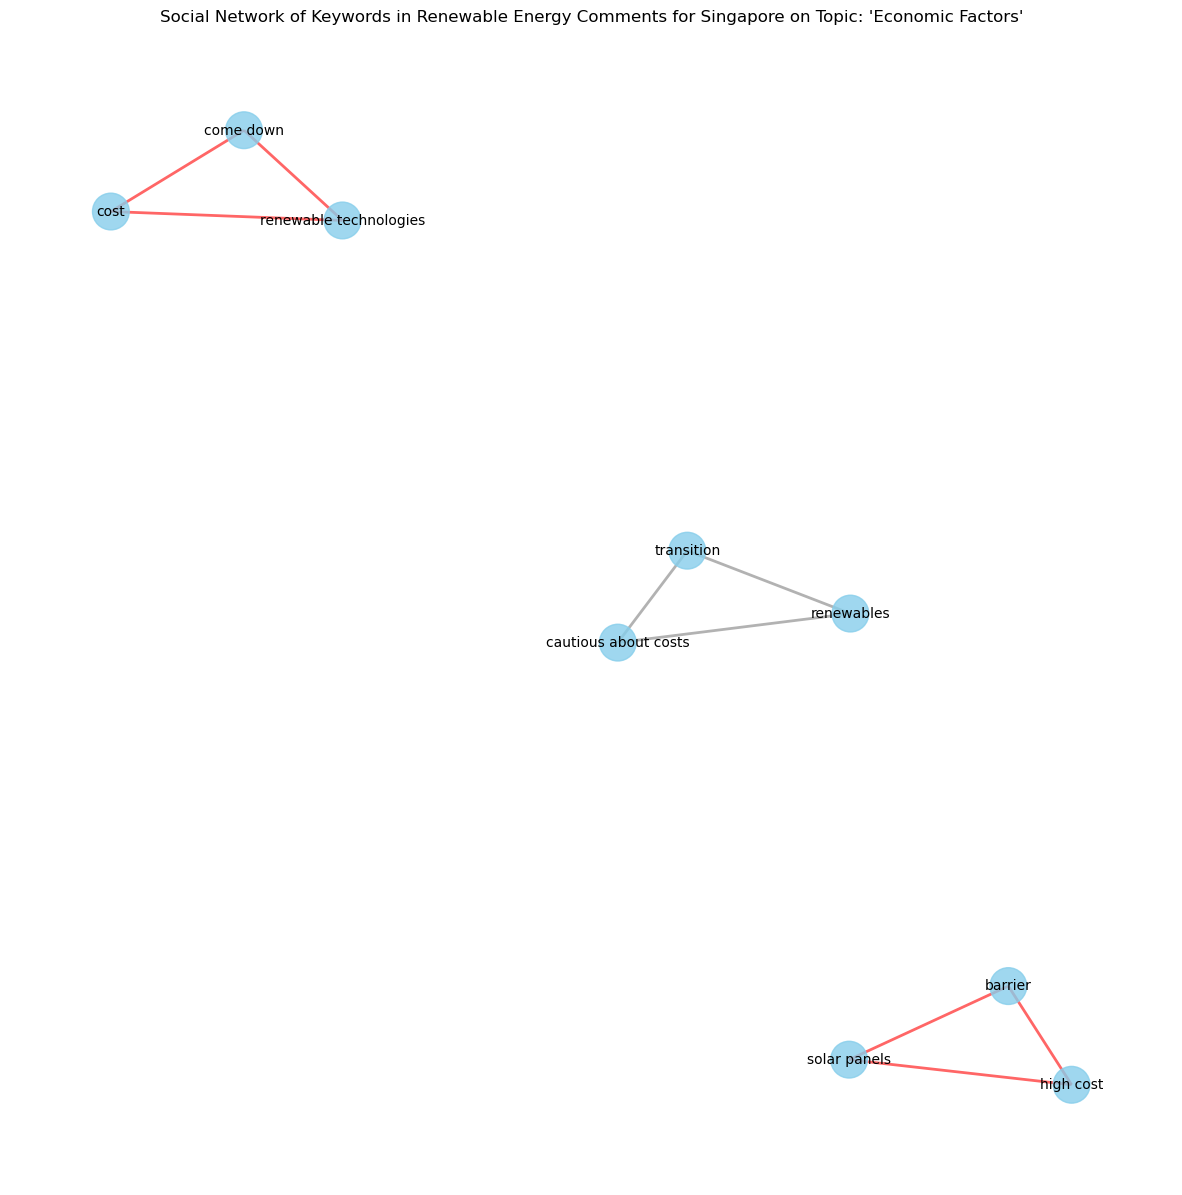

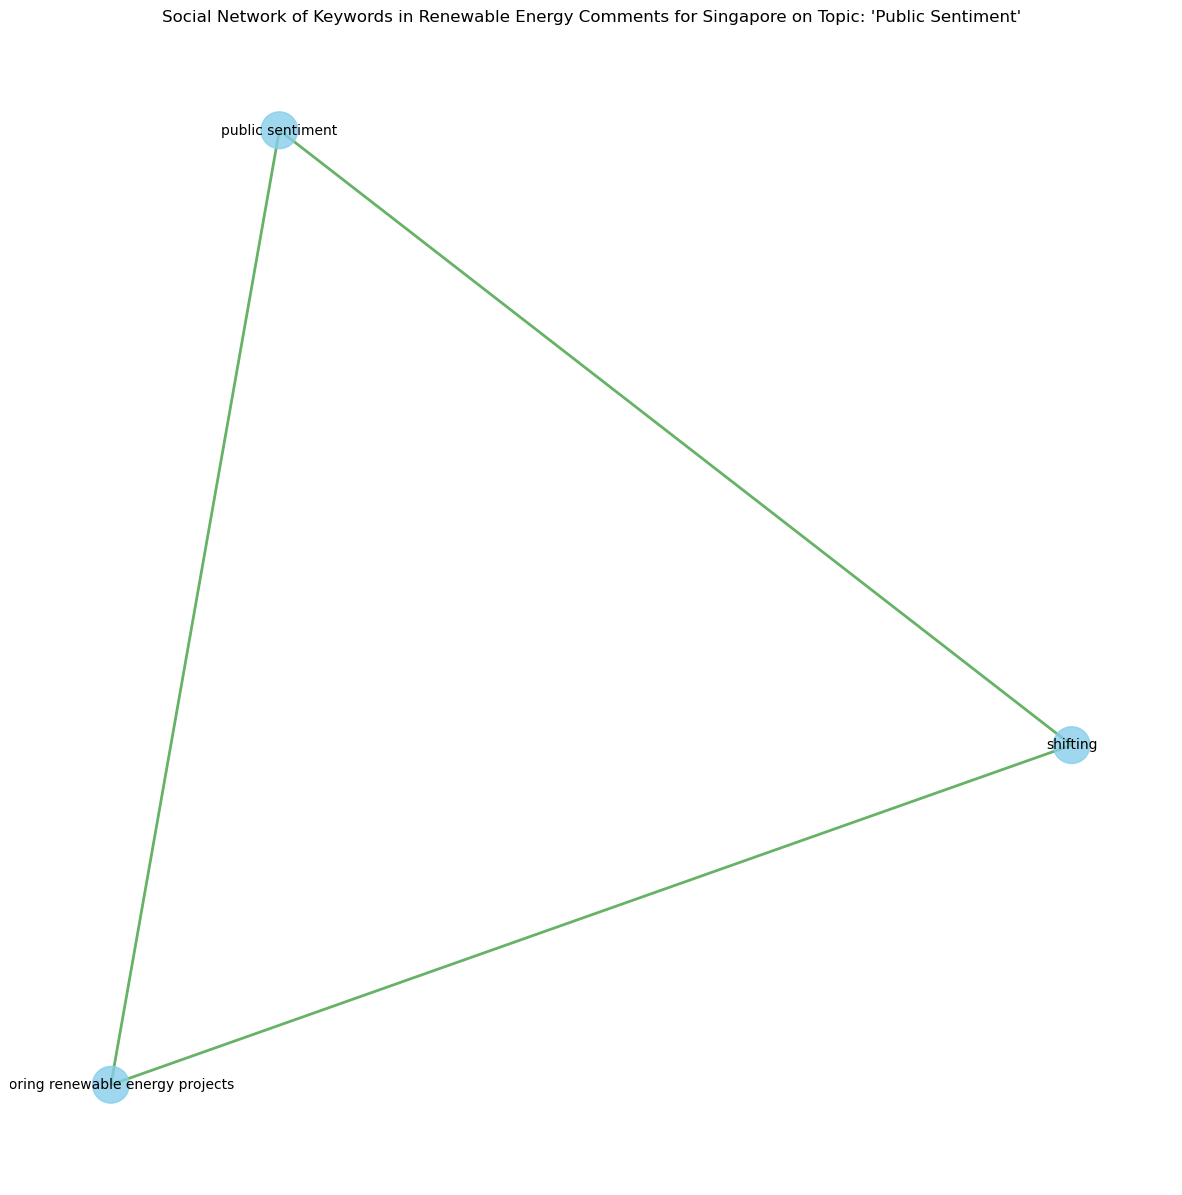

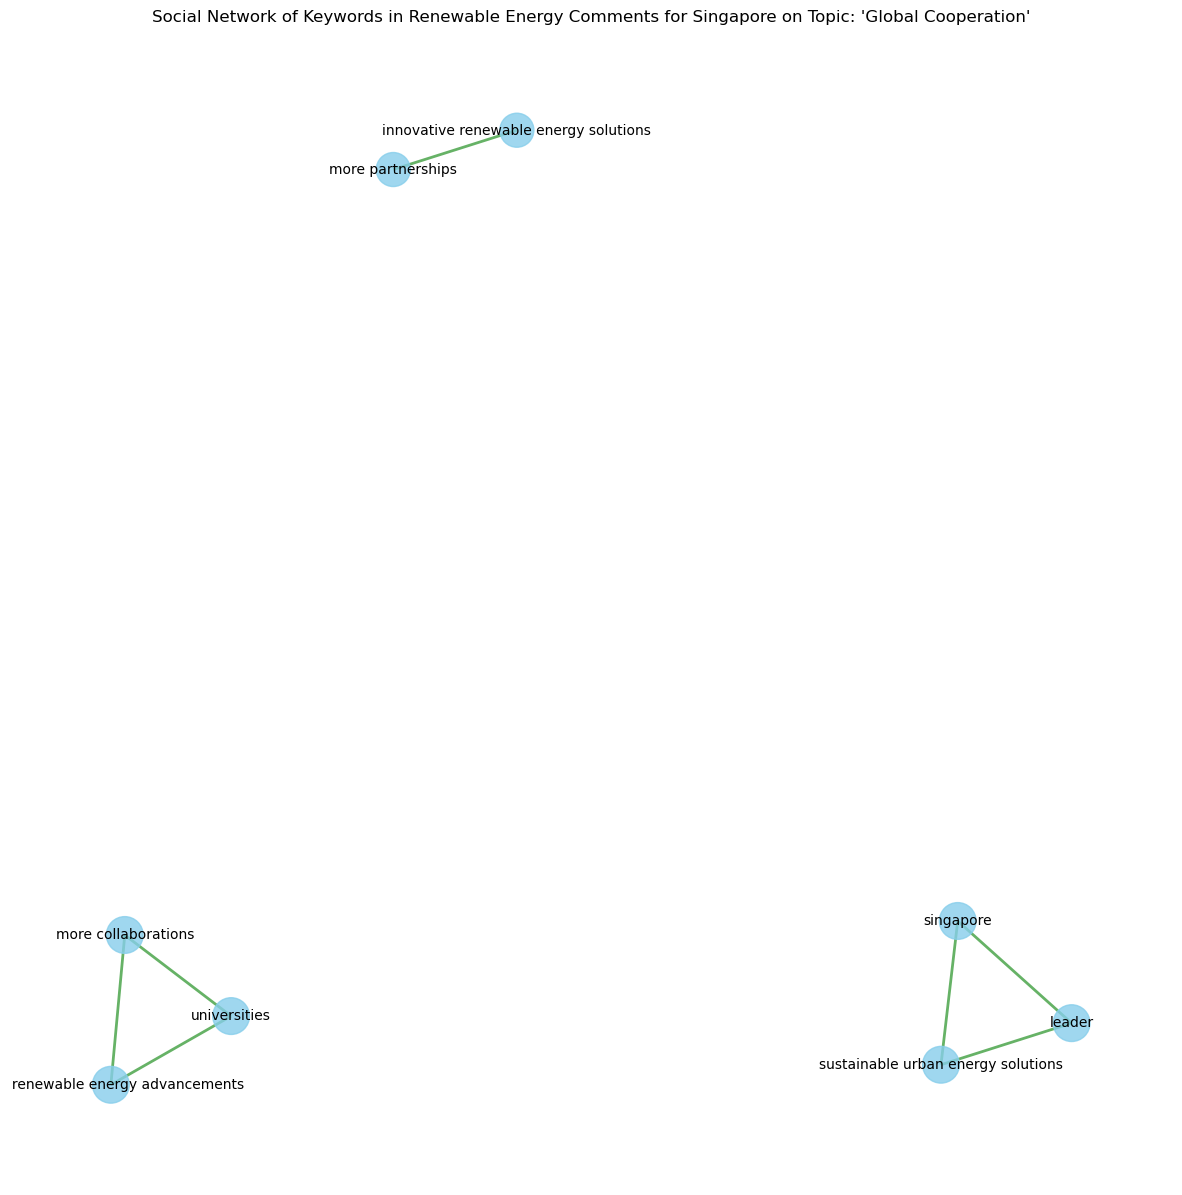

In [179]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the dataset from Excel
file_path = 'Comment_topics.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Function to clean keywords
def clean_keywords(keyword_string):
    return [kw.strip().lower() for kw in keyword_string.split(',')]

# Apply keyword cleaning to the 'Keywords' column
df['Keywords'] = df['Keywords'].apply(clean_keywords)

# Function to create a social network graph with sentiment-based edges
def create_sentiment_network_graph(df, country, topic, weight_threshold=2, top_n_nodes=None):
    # Filter the DataFrame for the specified country and topic
    filtered_df = df[(df['Country'].str.lower() == country.lower()) & (df['Topic'] == topic)]

    # Initialize a network graph
    G = nx.Graph()

    # Add nodes and edges based on co-occurrence of keywords in each comment, with sentiment
    for _, row in filtered_df.iterrows():
        keywords = row['Keywords']
        sentiment = row['Sentiment'].lower()  # Get the sentiment of the comment

        # Create edges between all pairs of keywords within the same comment
        for kw1, kw2 in combinations(keywords, 2):
            if G.has_edge(kw1, kw2):
                G[kw1][kw2]['weight'] += 1  # Increment weight if the edge already exists
            else:
                # Initialize the edge with sentiment
                G.add_edge(kw1, kw2, weight=1, sentiment=sentiment)

    # Remove edges below the weight threshold
    G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] < weight_threshold])

    # Optionally filter to keep only the top N most connected nodes
    if top_n_nodes:
        degrees = dict(G.degree())
        top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_n_nodes]
        G = G.subgraph(top_nodes).copy()

    # Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))

    # Draw the network graph
    plt.figure(figsize=(15, 15))

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Get edge colors based on sentiment
    edge_colors = []
    for u, v, d in G.edges(data=True):
        if d['sentiment'] == 'positive':
            edge_colors.append('green')
        elif d['sentiment'] == 'negative':
            edge_colors.append('red')
        else:
            edge_colors.append('gray')  # Neutral sentiment

    # Draw nodes
    node_sizes = [500 + (len(list(G.neighbors(n))) * 100) for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)

    # Draw edges with sentiment-based colors
    nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors, alpha=0.6)

    # Add labels to nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Display the graph
    plt.title(f"Social Network of Keywords in Renewable Energy Comments for {country.capitalize()} on Topic: '{topic}'")
    plt.axis('off')
    plt.show()

# Example usage: create separate graphs for each topic
country = 'Singapore'  # Specify the country
topics = df['Topic'].unique()  # Get unique topics

for topic in topics:
    create_sentiment_network_graph(df, country, topic, weight_threshold=0, top_n_nodes=2000)
